# Data Visualization, Preprocessing, and Analysis

When you see data or studies be referenced by a newscaster, politician, or some other public figure, they tend not to point to the actual data sets or the logs of information. Rather, they will make use of pie charts, bar graphs, histograms, and many different kinds of graphs in order to concisely summarize large sums of data and quickly draw conclusions.

Granted, while people or groups can use graphs to deceive the public in an attempt to give their views more credibility (from omitting data points to adjusting graph scales), the point still stands: graphs are a great way to provide a visual representation of data.

# Part 1: Matplotlib

To get started, let's import ```numpy``` and ```pandas``` from last time, but also include a new library: ```matplotlib.pyplot```.

Note: If you get an error message similar to "no module found 'matplotlib.pyplot'", refer to `pip` on learning how to install these libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display

Matplotlib is far and away the most popular data visualization tool in Python. It's used all across the Python spectrum, from academic purposes to the workforce, and many other data visualization libraries in Python build on top of the work of Matplotlib, including Seaborn!

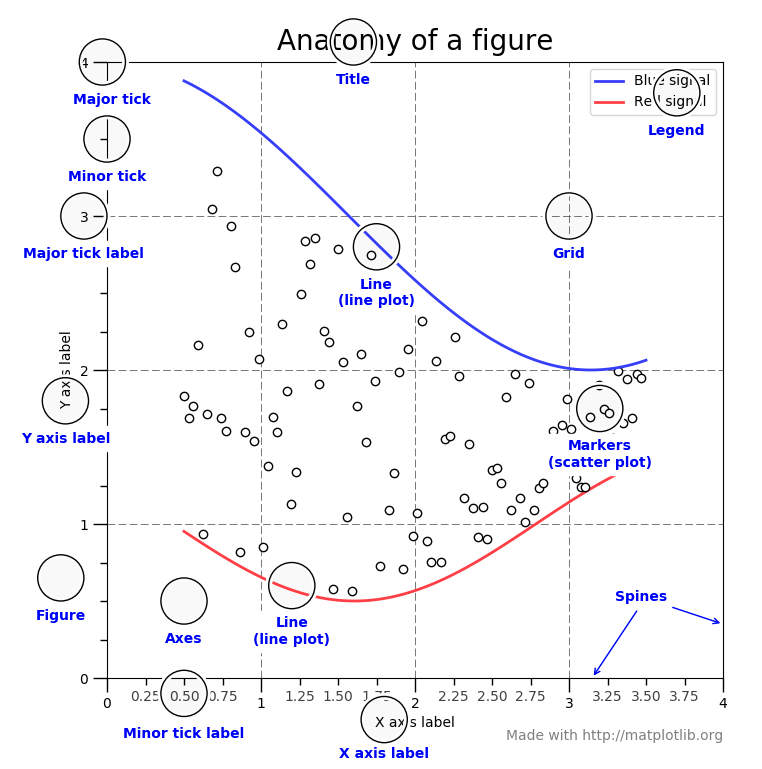

In [2]:
IPython.display.Image('nppd/matplotlib.png')

## Part 1.1: Matplotlib Terminology + Line Graphs

If you have an array of data, this can be easily plotted by calling ```plt``` in the ```matplotlib``` library. The example below is a basic example of a line graph:

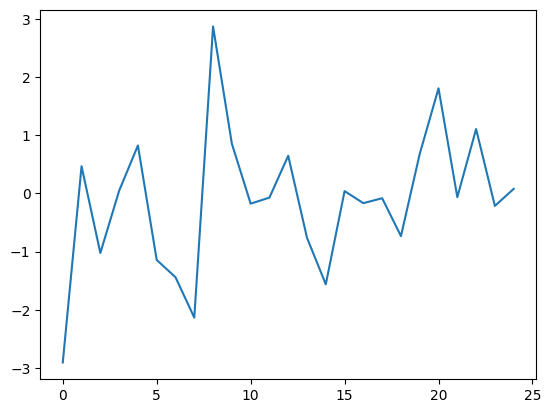

In [3]:
randoData = np.random.normal(0, 1, [25])

plt.plot(randoData)
plt.show()

Notice that by default, if you call ```plot()```, it *can* take in just one parameter: the y value. Under this case, it makes the assumption that your x-values start at 0 and increment by one each time.

Additional note: When running `matplotlib` in a IPython or Notebook environment, you can actually get away with not using `plt.show()`! Try it, comment out that line in the previous code block, and see if the graph still displays! However, if you're running a Python script or other file (e.g. a Flask environment), then using `plt.show()` is a *must*. Therefore, it's good practice to always include `plt.show()` in your code, even if you're running in a notebook.

However, if we want to manually input our values, we can do so as well. Just remember that if we do this using two parameters, the first parameter is our **x** value, and the second parameter is our **y** value.

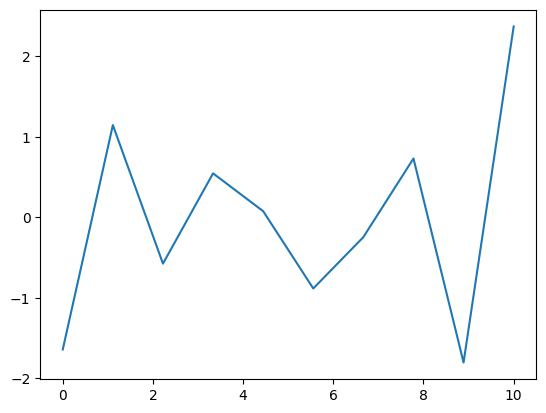

In [4]:
x=np.linspace(0,10,10)
y=np.random.normal(0,1,[10])
plt.plot(x, y)
plt.show()

One more thing to note from above: if we do choose to have an ```x``` and ```y``` parameters, then the number of values (lengths) of ```x``` and ```y``` *must* be the same. If not, then our program will raise an exception (and why wouldn't it? If you had eleven x values, but only ten y values, then how do you know what x value is going to be left without a corresponding y value?)

To change the color of a line in a plot, just call ```color``` or ```c``` as a parameter.

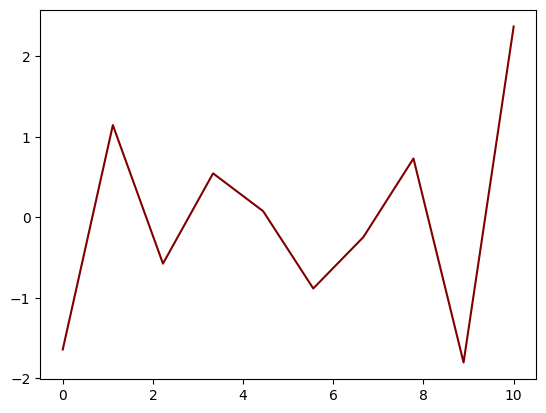

In [5]:
plt.plot(x, y, color="maroon")
# The code below should yield the same result
# plt.plot(x, y, c="maroon")
plt.show()

We can call a scatter plot by calling ```.scatter()```. Just like ```.plot()```, it can take in both an ```x``` and ```y``` parameter, and just like the ```x``` and ```y``` parameters in ```.plot()```, both must be of the same length. We can also change the color of each scatterplot entry by using ```color``` as a parameter, and we can change the marker by calling ```marker``` as a parameter.

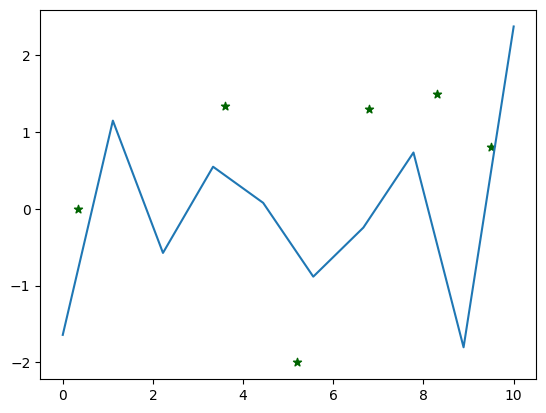

In [6]:
plt.plot(x, y)
plt.scatter([8.3, 6.8, 5.2, 0.34, 9.5, 3.6], [1.5, 1.3, -2, 0, 0.8, 1.34], color='darkgreen', marker='*')
plt.show()

By default, matplotlib will establish an x-limit and a y-limit such that all entries in a graph will fit nicely. However, that might not be suitable at times (for example: a line graph where most values have a corresponding y-value in between -2 and 2, but we have a single value that's greater than 10,000). Alternatively, we might want to be able to zoom into a portion of a graph.

That's where ```.xlim()``` and ```.ylim()``` come in. Both take in two parameters: the first creates the lower bounds, and the second creates the upper bounds.

In the example below, if we wanted to zoom into the x-values between 0 and 5, and zoom into the y-values between -0.5 and 0.5, we can do it like so:

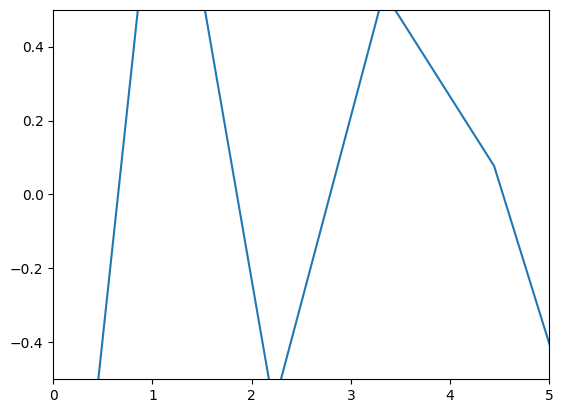

In [7]:
plt.plot(x, y)
plt.xlim(0,5)
plt.ylim(-0.5,0.5)
plt.show()

The information we presented is really cool so far, but even if we were to plot some points and slap that onto a lab report, we'd still likely get points taken off for our graphs. It might not be because of faulty data or because we plotted our points incorrectly, but rather, we're missing our title and our axis labels!

To add a title and axis labels, we can call them with ```.title()```, ```.xlabel()```, and ```.ylabel()```. They all take in a single parameter: a string with the title/label name you want.

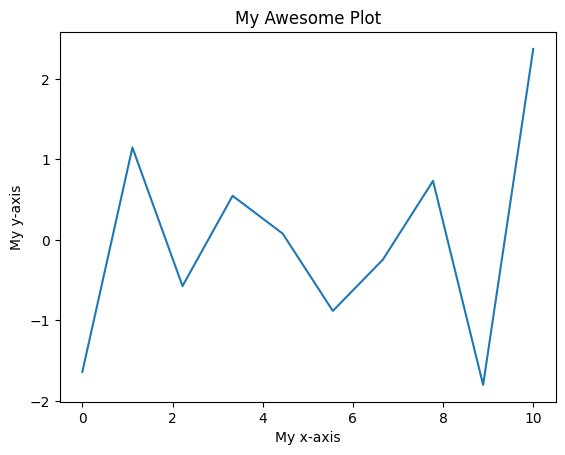

In [8]:
plt.plot(x, y)
plt.title('My Awesome Plot')
plt.xlabel('My x-axis')
plt.ylabel('My y-axis')
plt.show()

Challenge time: what if we want to plot multiple lines on a single graph? The nice thing about matplotlib is that this is entirely possible! In fact, you don't have to do any extra steps! You can just call ```.plot()``` for all plots you want on a single graph, and show the results!

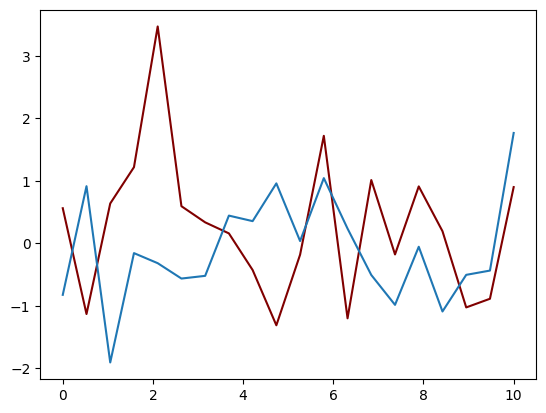

In [9]:
x=np.linspace(0,10,20)
y1=np.random.normal(0,1,[20])
y2=np.random.normal(0,1,[20])
plt.plot(x, y1, c="maroon")
plt.plot(x, y2)
plt.show()

That's cool, but how do I know which line is which? You might already know the answer to this, but you likely won't be so confident once we introduce more lines. We can solve this by calling ```label``` as a parameter inside of ```.plot()```... right?

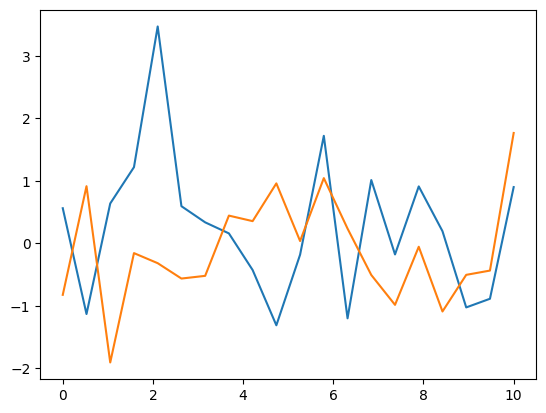

In [10]:
plt.plot(x, y1, label='Uno')
plt.plot(x, y2, label='Dos')
plt.show()

...not quite. Sure, we assigned labels to each line, but to the average viewer, they won't be able to distinguish between which line is which. Instead, to show the labels, we need to call ```.legend()``` (with the parantheses because this is a function, but there are no parameters needed for it).

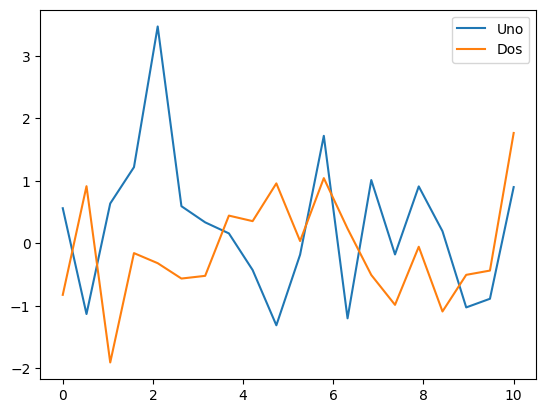

In [11]:
plt.plot(x, y1, label='Uno')
plt.plot(x, y2, label='Dos')
plt.legend()
plt.show()

Now we know how to graph several line plots on a single graph. Now let's flip the script: what if I want to have multiple line plots on separate graphs?

Before we answer that, we can use subplots. An example of a singular subplot on a figure is shown below.

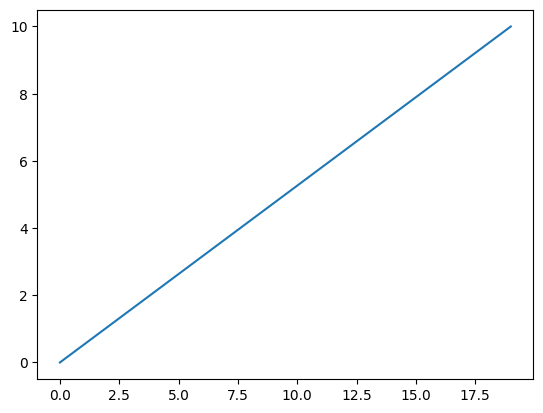

In [12]:
fig = plt.figure()  # an empty figure with no axes
ax = fig.add_subplot() # give it an axes
ax.plot(x) # add the plot
plt.show()

If we want multiple subplots, we can adjust the number of subplots we want with the first two parameters. The ```.subplots()``` function creates a "matrix" of plots, with the first two parameters deciding how many rows and columns of plots we want, respectively.

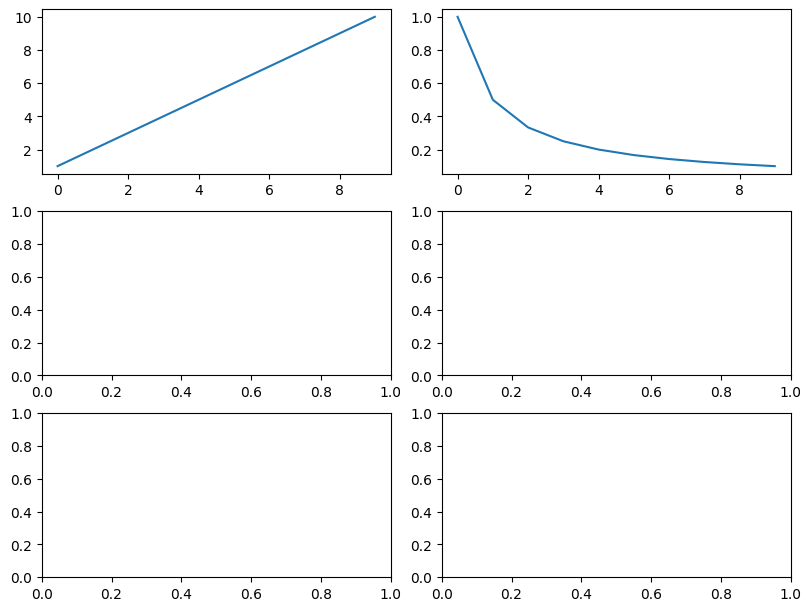

In [13]:
fig, ax = plt.subplots(3, 2, constrained_layout = True, figsize = (8, 6)) # 4 empty subfigure with a 2x2 grid of Axes

## access the axes with slicing
x=np.linspace(1,10,10)
ax[0,0].plot(x)
ax[0,1].plot(1 / x)
plt.show()

Well, that's really cool, but we can also use it to be able to graph lines or actual equations, too! To do this, we can use ```linspace``` (remember this from the ```numpy``` library?) to create an array of values subdivided into smaller increments.

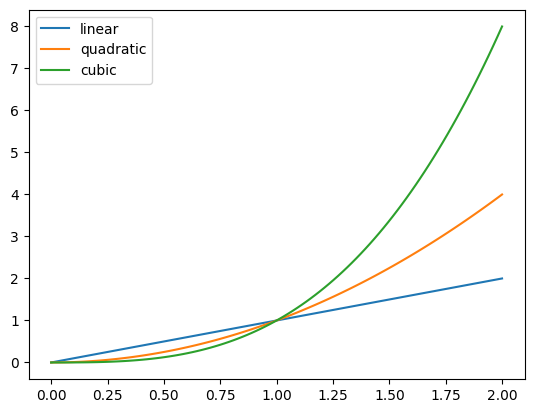

In [14]:
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.legend()
plt.show()

## Part 1.2: Scatter Plot

I showed this off a little while back, but we can also create scatterplots with Matplotlib! A **scatter plot** is a mathematical diagram used to display values on a Cartestian coordinate system, primarily to determine the relationship between variables among data points.

For this data, I will be sourcing housing prices in the Bryan-College Station, TX metro area. Let's read in the data and plot the relationship between the house's listing price (in thousands of dollars) and the total amount of square feet in each house.

In [15]:
house = pd.read_csv('nppd/bcs.csv')
house.head(5)

,Price,Sqft,Baths,Location
0,2400,4918,4.5,"Bryan, TX"
1,680,3645,3.0,"Bryan, TX"
2,570,1900,2.0,"Bryan, TX"
3,400,3123,3.5,"Bryan, TX"
4,320,2365,3.0,"Bryan, TX"


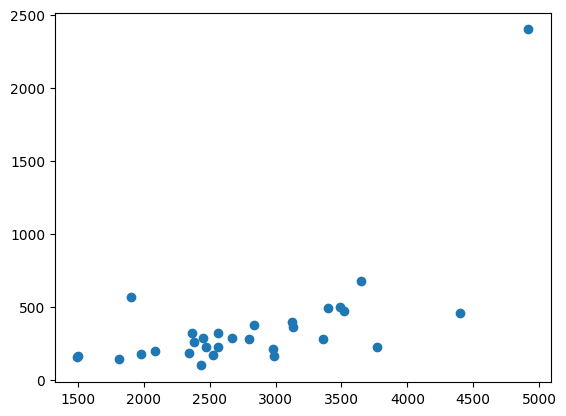

In [16]:
plt.scatter(house['Sqft'], house['Price'])
plt.show()

So what does this tell us? Truth be told, it's a little hard to tell, primarily because of matplotlib having to zoom out so far to accomodate that single outlier (the house with ~5000 sqft and listed at $2.4M). In addition, it's hard to tell anything because we don't have a title nor labels. Let's readjust by slicing our dataframe to only get homes less than $1M.

In [17]:
house = house[house['Price'] < 1000]
house.head(5)

,Price,Sqft,Baths,Location
1,680,3645,3.0,"Bryan, TX"
2,570,1900,2.0,"Bryan, TX"
3,400,3123,3.5,"Bryan, TX"
4,320,2365,3.0,"Bryan, TX"
5,280,3361,3.0,"Bryan, TX"


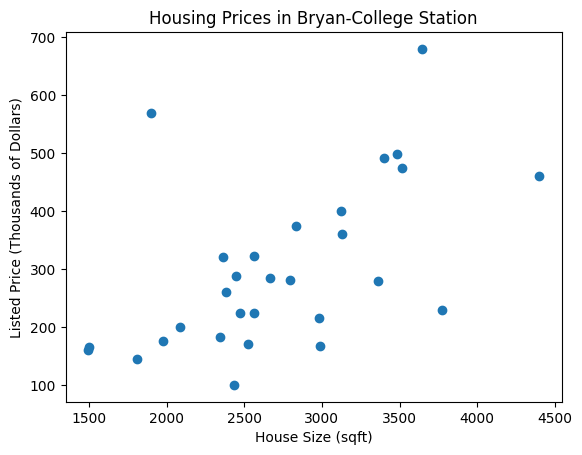

In [18]:
plt.scatter(house['Sqft'], house['Price'])
plt.xlabel('House Size (sqft)')
plt.ylabel('Listed Price (Thousands of Dollars)')
plt.title('Housing Prices in Bryan-College Station')
plt.show()

Here, we can see a *generally* positive correlation between the house size (x-axis) and the house price (y-axis).

We can also plot more types of variables in our graph by using additional variable coding among our values. This can include changing properties of the points such as its color, shape, size, etc. Below is the same scatterplot, but with the addition of color-coding, with the color determined by the differing number of bathrooms. We change the color by using the `c` parameter in our scatter plot.

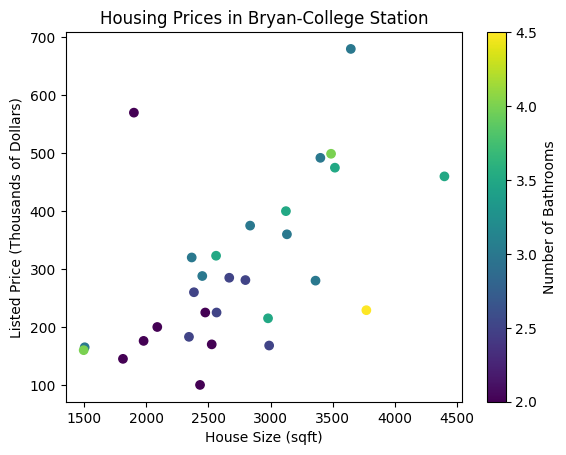

In [19]:
plt.scatter(x=house['Sqft'], y=house['Price'], c=house['Baths'])
cbar = plt.colorbar()
cbar.set_label('Number of Bathrooms')
plt.xlabel('House Size (sqft)')
plt.ylabel('Listed Price (Thousands of Dollars)')
plt.title('Housing Prices in Bryan-College Station')
plt.show()

Let's do one more variable coding with our scatterplot! In our scatterplot below, we will use different shapes among our data points to show off the differences by city. We can change the shape of our data points with the `marker` parameter. We will also use a legend to show off the different kinds of data points among cities; in this case, circle data points indicate homes in Bryan, while diamond data points indicate homes in College Station.

In [20]:
bryan = house[house['Location'] == "Bryan, TX"]
cstat = house[house['Location'] == "College Station, TX"]
cstat.head(5)

,Price,Sqft,Baths,Location
15,499,3486,4.0,"College Station, TX"
16,492,3400,3.0,"College Station, TX"
17,475,3517,3.5,"College Station, TX"
18,460,4398,3.5,"College Station, TX"
19,375,2835,3.0,"College Station, TX"


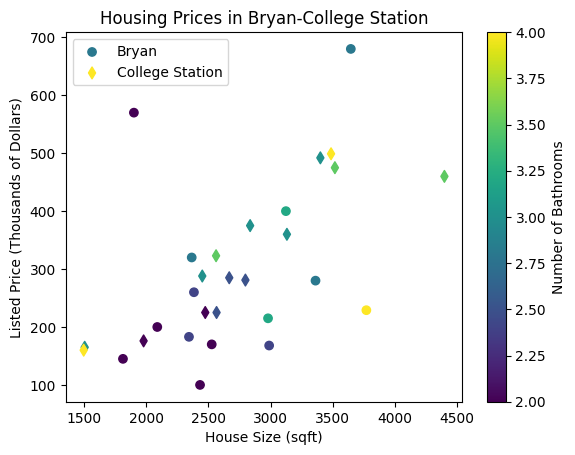

In [21]:
plt.scatter(x=bryan['Sqft'], y=bryan['Price'], c=bryan['Baths'], marker='o')
plt.scatter(x=cstat['Sqft'], y=cstat['Price'], c=cstat['Baths'], marker='d')
plt.legend(['Bryan', 'College Station'])
cbar = plt.colorbar()
cbar.set_label('Number of Bathrooms')
plt.xlabel('House Size (sqft)')
plt.ylabel('Listed Price (Thousands of Dollars)')
plt.title('Housing Prices in Bryan-College Station')
plt.show()

Of course, this previous example is taking it too far. If you show off this graph to any person, they will be confused at what you're trying to display, even if you give them context. The best scatter plots (or any graphs, for that matter) paint a simple picture of our data without trying to overload us with a bunch of extra information. If you're interested in learning more, here's a useful webpage listing [10 rules for making better graphs](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833#s3).

## Part 1.3: Histograms

A histogram is a graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable. Histograms are used to summarize discrete or continuous data that are measured on an interval scale.

In the example below, we will create a histogram to visualize distribution of the age of the runners of the 2019 Boston marathon.

In [22]:
boston = pd.read_csv('nppd/2019-boston-marathon-results.csv')
boston.head(5)

,Rank_Tot,Age,Gender,Country,Result_hr,Result_sec,Rank_Gender,Country_code
0,1,30,M,Kenya,2:07:57,7677,1,KEN
1,2,29,M,Ethiopia,2:07:59,7679,2,ETH
2,3,34,M,Kenya,2:08:07,7687,3,KEN
3,4,32,M,Kenya,2:08:54,7734,4,KEN
4,5,26,M,Kenya,2:08:55,7735,5,KEN


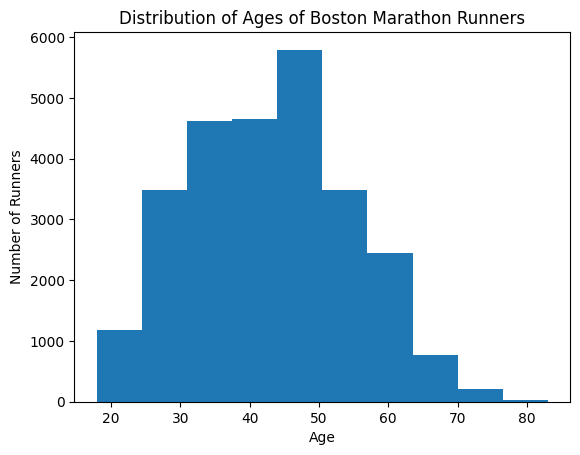

In [23]:
plt.hist(boston['Age'])
plt.xlabel('Age')
plt.ylabel('Number of Runners')
plt.title('Distribution of Ages of Boston Marathon Runners')
plt.show()

Here, we can see that the average age distribution for Boston Marathon runners looks *similar* to a bell curve, with the exception of a large increase in the 45-52-ish age range.

We can adjust the bins to either group people based on a predetermined set of bins, or increase/decrease the total amount of bins. By default, the number of bins is 10. In the example below, we increase this to 20.

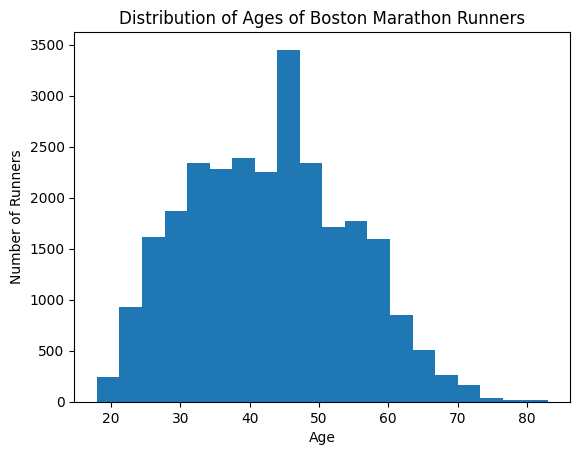

In [24]:
plt.hist(boston['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Number of Runners')
plt.title('Distribution of Ages of Boston Marathon Runners')
plt.show()

As always, just like many other kinds of plots in matplotlib, we can do some styling. In the plot below, we change the default color of the bars from blue to maroon.

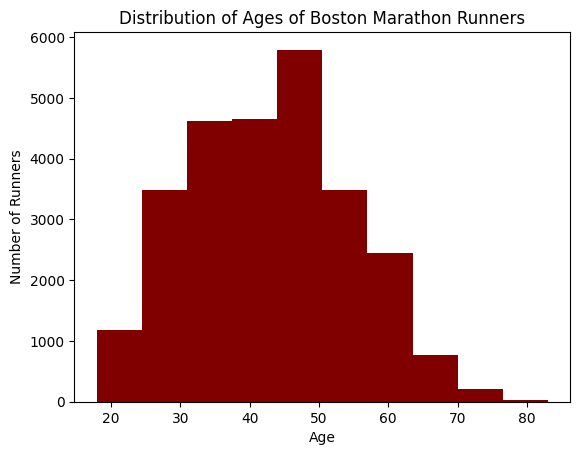

In [25]:
plt.hist(boston['Age'], color='maroon')
plt.xlabel('Age')
plt.ylabel('Number of Runners')
plt.title('Distribution of Ages of Boston Marathon Runners')
plt.show()

Now, we can adjust the alpha value (transparency; by default is set to 1, meaning no transparency) and edge color of the bars.

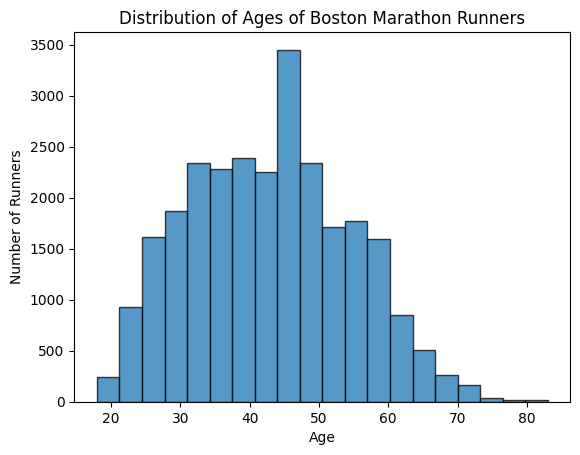

In [26]:
plt.hist(boston['Age'], bins=20, alpha=0.75, ec='black')
plt.xlabel('Age')
plt.ylabel('Number of Runners')
plt.title('Distribution of Ages of Boston Marathon Runners')
plt.show()

We can also adjust the bins to our own values! In the example below, we are adjusting the bins to the different age categories defined by the Boston Athletics Association.

**Note:** When defining bins with an array, this may lead to the bins being unequally spaced (see the graph below as an example), and every bin except for the last one will be "half-open". In other words, if bins is `[1, 2, 3, 4]`, then the first bin will count all values between `[1, 2)` (all values greater than or equal to 1 but strictly less than 2), the second bin will count all values between `[2, 3)`, and the third and final bin will count all values between `[3, 4]`.

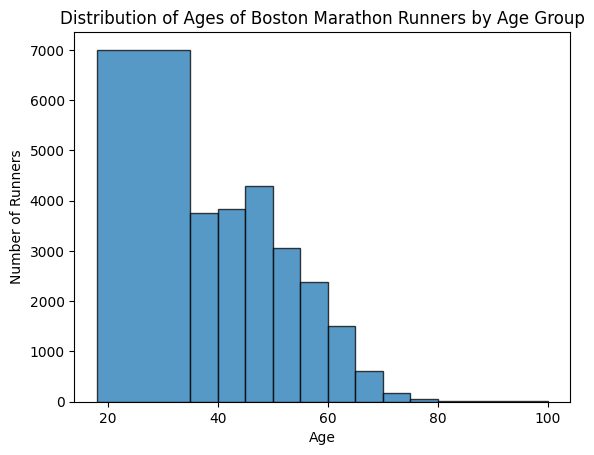

In [27]:
plt.hist(boston['Age'], bins=[18,35,40,45,50,55,60,65,70,75,80,100], alpha=0.75, ec='black')
plt.xlabel('Age')
plt.ylabel('Number of Runners')
plt.title('Distribution of Ages of Boston Marathon Runners by Age Group')
plt.show()

## Part 1.4: Other Cool Graphs

### Part 1.4.1: Bar Charts

A bar chart is a graphical representation of data where individual categories are represented by rectangular bars. Bar charts are used to compare different categories or groups, and are different from histograms in that bar charts group data into categories, while histograms group them by bins/intervals.

The below graph is an example of a bar chart, showcasing the frequency of nationality among the top 25 finishers of the Boston Marathon.

Index(['United States', 'Kenya', 'Japan', 'Ethiopia', 'Eritrea', 'Morocco',
       'United Kingdom'],
      dtype='object', name='Country')


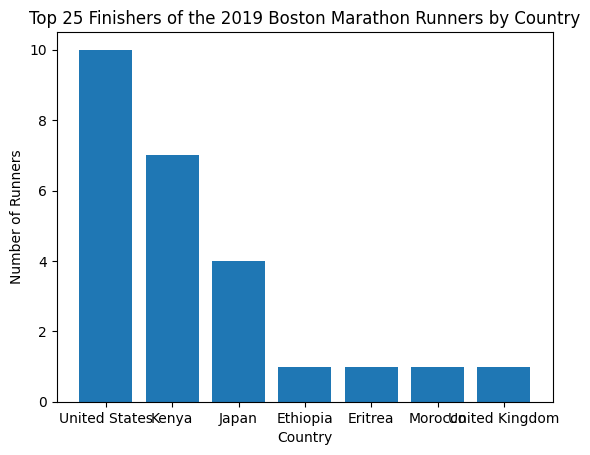

In [28]:
top25count = boston['Country'].iloc[:25].value_counts()
print(top25count.index)
plt.bar(top25count.index, top25count)
plt.xlabel('Country')
plt.ylabel('Number of Runners')
plt.title('Top 25 Finishers of the 2019 Boston Marathon Runners by Country')
plt.show()

One thing to note is that in the chart above, the spacing between values is a little awkward, especially between the Morocco and United Kingdom entries. There are a few ways to go about fixing this (e.g. decreasing font size, rotating the x-axis values), but for simplicity, we will instead just replace the countries with their 3-letter country codes.

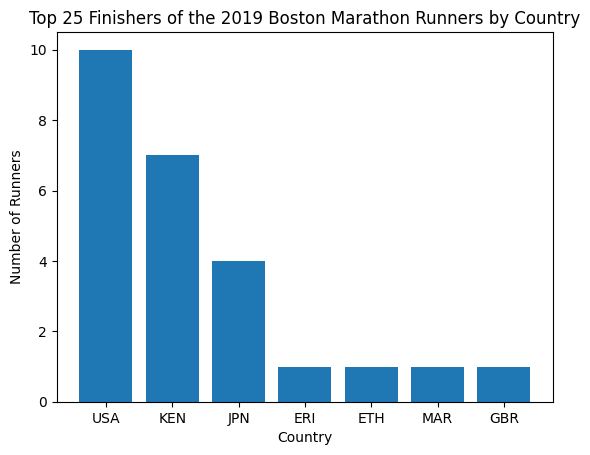

In [29]:
plt.bar(top25count.index, top25count)
plt.xticks(top25count.index, ['USA', 'KEN', 'JPN', 'ERI', 'ETH', 'MAR', 'GBR'])
plt.xlabel('Country')
plt.ylabel('Number of Runners')
plt.title('Top 25 Finishers of the 2019 Boston Marathon Runners by Country')
plt.show()

And on the topic of styling, let's just also show off one more coloring example, pertaining to bar charts. In this graph, we are color coding by continent.

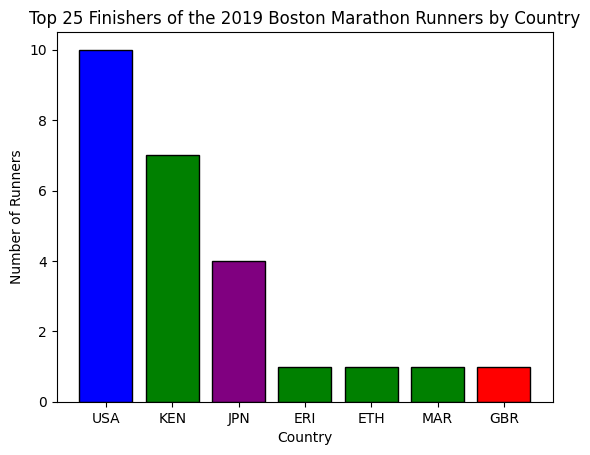

In [30]:
color_list = ['blue', 'green', 'purple', 'green', 'green', 'green', 'red']
plt.bar(top25count.index, top25count, color=color_list, edgecolor='black')
plt.xticks(top25count.index, ['USA', 'KEN', 'JPN', 'ERI', 'ETH', 'MAR', 'GBR'])
plt.xlabel('Country')
plt.ylabel('Number of Runners')
plt.title('Top 25 Finishers of the 2019 Boston Marathon Runners by Country')
plt.show()

### Part 1.4.2: Pie Charts

Let's say we want to find the percentage of men versus women who completed the Boston Marathon in 2019. How would we go about that? Well, a first attempt might look something like this:
```
plt.pie(boston['Gender'])
plt.show()
```

However, the code above will result in a compile error. The reason our code wasn't able to handle that was because we did not make the distinction that we wanted to count the different categories in our code. Sure, this does sound pretty silly, but think about it for a second: the computer can't process an individual 'M' value.

The way we can go about getting an array that counts the unique values is by using ```.value_counts()```.

Gender
M    14670
F    11981
Name: count, dtype: int64


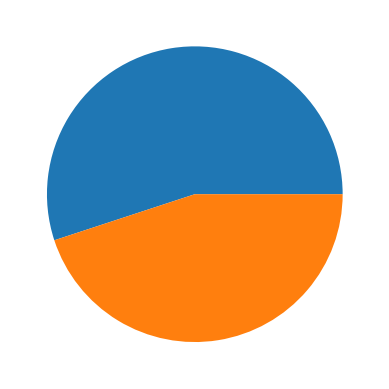

In [31]:
plt.pie(boston['Gender'].value_counts())
print(boston['Gender'].value_counts())
plt.show()

Ok, now we have a pie chart, but this tells us basically nothing. It looks more like a sand dune during the day than it does a pie chart, and we have little context for this: we don't know what this is about, there's no title, there's no legend, no percentages - point is, this fails at being a good pie chart.

What can we do to fix it? For starters, giving it some labels and a title would be nice. We can do this by adding ```labels``` as a parameter, and call ```.title()``` to assign a proper title.

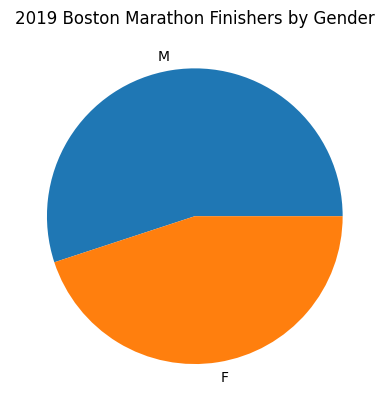

In [32]:
gender = boston['Gender'].value_counts()
gender_labels = ['M', 'F']
plt.pie(gender, labels=gender_labels)
plt.title("2019 Boston Marathon Finishers by Gender")
plt.show()

This looks way better, but we can still do more. For instnace, while we now know more men have completed the 2019 Boston Marathon than women, we still don't know the overall percentage. We know it's greater than 50%, but what is it exactly? 60%? 55%?

We can fix this by calling ```autopct``` in the parameters of ```.pie()``` to assign a percentage to the graph. We can put in a formatted string (f-string) to accurately represent this.

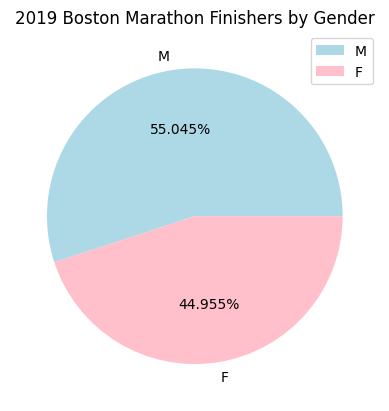

In [33]:
plt.pie(gender, labels=gender_labels, colors=['lightblue', 'pink'], autopct='%1.3f%%')
plt.title("2019 Boston Marathon Finishers by Gender")
plt.legend()
plt.show()

Now we're talking! Two more basic features of ```.pie()``` that we can go over are the ```explode``` and ```startangle``` parameters.

```explode``` takes in a tuple and for the number of distinct items in the pie chart, we can set a value to offset that specific wedge. For example, in the chart below, we can take the wedge containing the percentage of men and separate that from the rest of the wedges (or wedge, singular, in this case).

```startangle``` adjusts the possible starting angle of the data by a certain number of degrees counter-clockwise. Assuming that our starting point is due east of the pie chart (similar to a unit circle from calculus), we can call this "0 degrees"; then, we can rotate in a counter-clockwise direction for our starting angle. By default, ```startangle``` starts at 0 degrees (an example of a 35/25/25/15 pie chart with angles is displayed below).

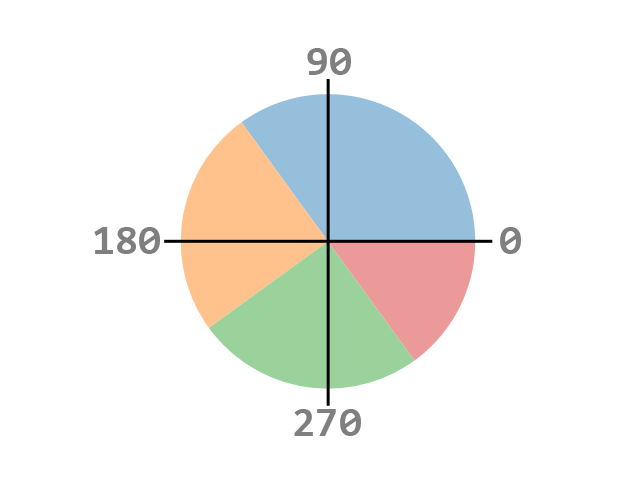

In [34]:
IPython.display.Image("nppd/img_matplotlib_pie_angles.png")

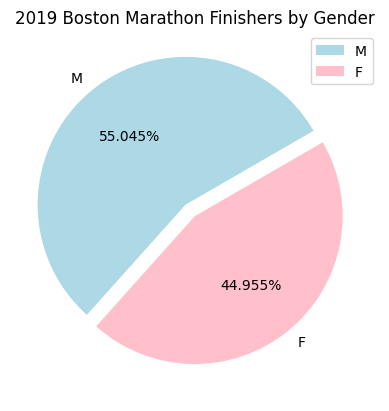

In [35]:
plt.pie(gender, labels=gender_labels, colors=['lightblue', 'pink'], autopct='%1.3f%%', explode=(0.1, 0.0), startangle=30)
plt.title("2019 Boston Marathon Finishers by Gender")
plt.legend()
plt.show()

### Part 1.4.3: Heatmaps

The following lines of code below is to get you familiarized with heatmaps. We don't anticipate on using heatmaps often for this project, but this is still something really interesting that I think is worth pointing out. This example is pulled straight from the Matplotlib documentation, so if you're interested, go checkout their page on heatmaps.

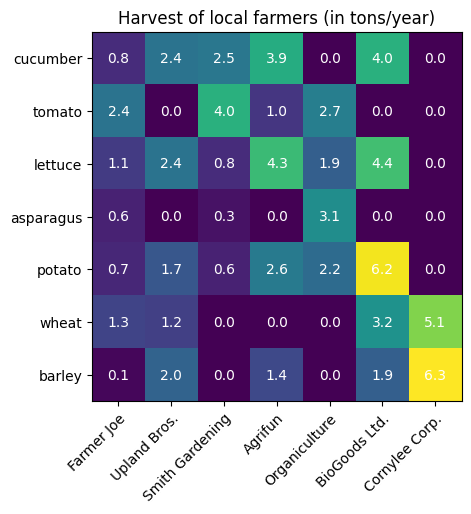

In [36]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)))
ax.set_xticklabels(farmers)
ax.set_yticks(np.arange(len(vegetables)))
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
plt.show()

# Part 2: Seaborn

Seaborn is a great data visualization library in Python that provides a high-level interface for making beautiful plots in less or more intuitive code.

There are some general steps to making a basic plot in Seaborn:
* Step 1: Load in data
* Step 2: Choose figure aesthetics
* Step 3: Choose a plot type
* Step 4: Plot customization

These steps of course get more complicated as we make more complex plots, but let's start with the basics for now.

### **Step 0**: Import all necessary libraries

Before we can do anything with data, we need to import all the libraries we'll be using first (this is good practice!). We'll be using **pandas**, **matplotlib.pyplot**, and **seaborn**. Since this notebook will use data on a Google drive, we'll also use **drive** from the **google.colab** library. We'll give each library its industry standard alias as well.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Step 1**: Load our Data

Let's use pandas (pd) to read in and manipulate our data

In [38]:
grades = pd.read_csv('nppd/2009Grade.csv')
# Let's see what data we're working with!
print(grades.head())

   ID        Mid1    Mid2       Final         HW      Score Grade
0   1   91.666667   86.25   74.285714  33.425926  71.407077     C
1   2  100.000000   95.00   88.571429  88.491508  93.015734     A
2   3   88.888889  102.50  100.000000  84.387372  93.944065     A
3   4   83.333333   70.00   71.428571  59.994402  71.189077     C
4   5   91.666667   90.00   77.142857  25.766178  71.143926     C


### **Step 2**: Choose figure aesthetics

Seaborn has many styles to choose from. We'll explore more later, but let's use the default styling for now. This includes a grey grid called ```darkgrid```, 4 spines (borders of the figure), and the ```notebook``` style.

In [39]:
sns.set() # Set the default seaborn style

### **Step 3**: Choose a plot type

Seaborn offers many visualization types of plots, but let's start with a simple boxplot to build up from the basics first.

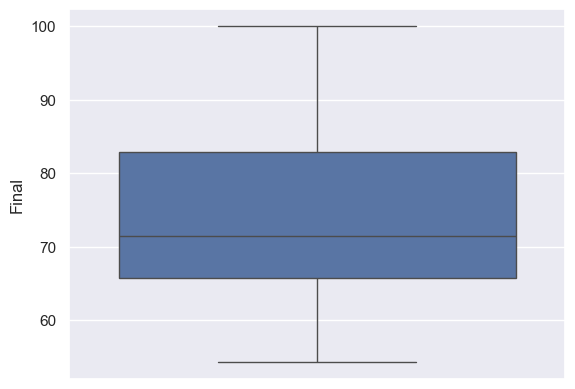

In [40]:
# Boxplot
b1 = sns.boxplot(data = grades, y = "Final", flierprops = {"marker": "x"})

While a boxplot is useful on it's own, we may find it more useful to separate a particular variable by some grouping. This is especially true for stratified data.

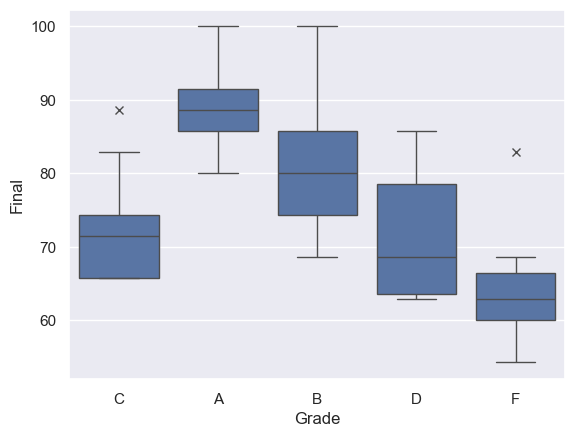

In [41]:
# Separated by letter grade
b2 = sns.boxplot(data = grades, x = "Grade", y = "Final", flierprops = {"marker": "x"}) # No custom colors

### **Step 4**: Plot Customization

Seaborn also allows us to pick our own color palette as well if we don't like their default colors. Here I defined a list of colors in their HEX code form (from the internet) to use in plots.

C:\Users\Eric\AppData\Local\Temp\ipykernel_32124\3308930531.py:5: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  b3 = sns.boxplot(data = grades, x = "Grade", y = "Final", hue="Grade", flierprops = {"marker": "x"}, palette = my_colors)


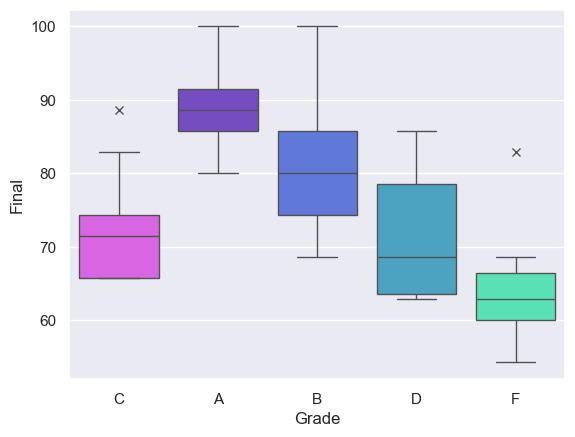

In [42]:
my_colors = ["#E951F5", "#7139D4", "#4C6CEB", "#39ADD4",
             "#43F7BE", "#F57F47", "#D43431"]

# Custom Colors
b3 = sns.boxplot(data = grades, x = "Grade", y = "Final", hue="Grade", flierprops = {"marker": "x"}, palette = my_colors)

Notice that I've been using matplotlib.pyplot as ```plt``` in my code so far. We can use ```plt``` on top of ```sns``` because seaborn was built based on matplotlib! Seasborn also integrates well with panda data structures, so it is worthwhile to consider the possibilities available to you with these 3 libraries alone. Let's customize our plot further with ```plt```:

C:\Users\Eric\AppData\Local\Temp\ipykernel_32124\1077337399.py:2: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  b4 = sns.boxplot(data = grades, x = "Grade", y = "Final", hue="Grade", flierprops = {"marker": "x"}, palette = my_colors)


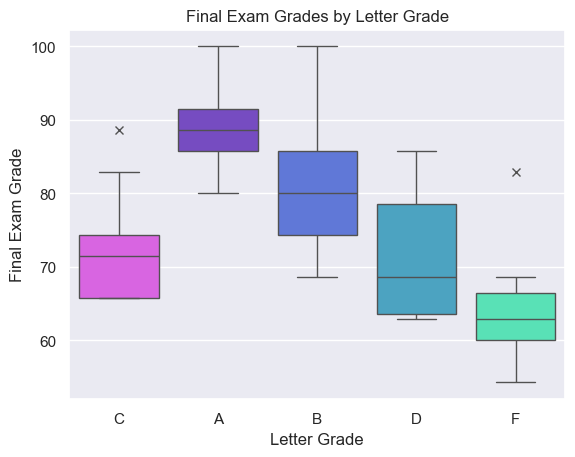

In [43]:
# Label customiation using Matplotlib Pyplot
b4 = sns.boxplot(data = grades, x = "Grade", y = "Final", hue="Grade", flierprops = {"marker": "x"}, palette = my_colors)
plt.title("Final Exam Grades by Letter Grade")
plt.xlabel("Letter Grade")
plt.ylabel("Final Exam Grade")
plt.show()
#plt.ylim(50, 100)

We can also save seaborn plots the same way we'd save matplotlib plots:

In [44]:
# Saving our b4 plot
b4_fig = b4.get_figure() # Get the figure in a variable
b4_fig.savefig("nppd/grade_boxplot_transparent.png", transparent = True) # Save as a transparent plot
b4_fig.savefig("nppd/grade_boxplot.png") # Save as a white background plot

### **More Plot Types**

Seaborn offers a variety of plotting types that build on matplotlib:
* Scatterplot
* Line plot
* Bar plot
* Swarm plot
* Box plot
* Violin plot
* Histogram Plot
* Joint plot
* Pair plot
* More...

And to plot these, we're going to use datasets built-in to seaborn now as well!

In [45]:
# List of all Seaborn Datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [46]:
# New dataset from Seaborn
restaurant = sns.load_dataset('tips')
print(restaurant.info()) # View the structure of the data frame, built with pandas!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [47]:
print(restaurant.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### **Histogram**

Text(0.5, 1.0, 'Total Bill')

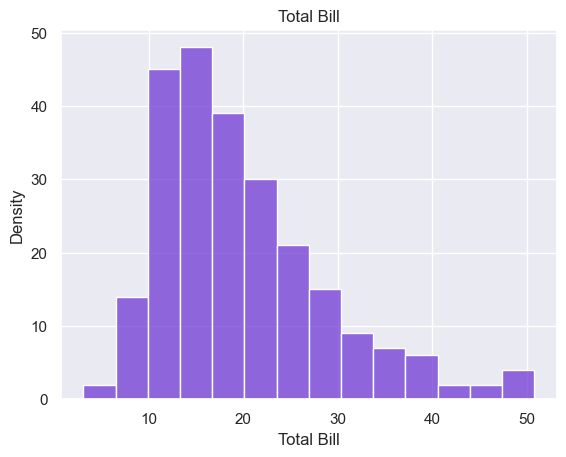

In [48]:
plt.clf() # Clear previous figure
swrm = sns.histplot(data = restaurant, x = "total_bill", color = my_colors[1])
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.title("Total Bill")

Text(0.5, 1.0, 'Total Bill Density')

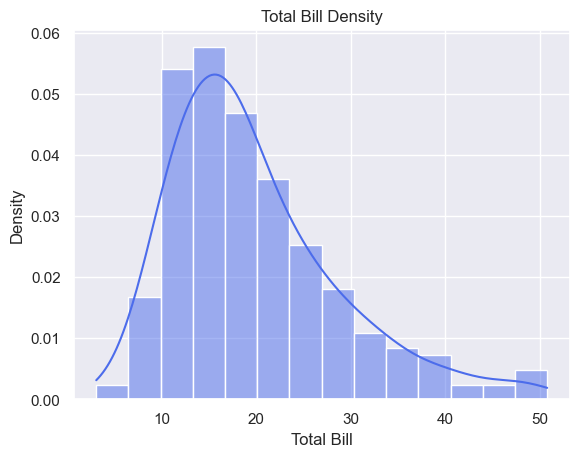

In [49]:
plt.clf() # Clear previous figure
hist1 = sns.histplot(data = restaurant, x = "total_bill", color = my_colors[2],
                     stat = "density", # Total area of bars is now 1
                     kde = True) # Kernel Density Est.
plt.xlabel("Total Bill")
plt.title("Total Bill Density")

### **Swarm Plot**

Text(0.5, 1.0, 'Tips by Gender')

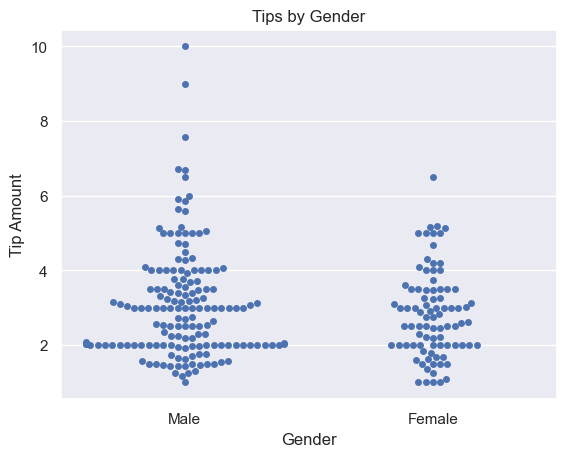

In [50]:
plt.clf() # Clear previous figure
swrm = sns.swarmplot(data = restaurant, x = "sex", y = "tip")
plt.xlabel("Gender")
plt.ylabel("Tip Amount")
plt.title("Tips by Gender")

### **Violin Plot**

Text(0.5, 1.0, 'Tips by Gender')

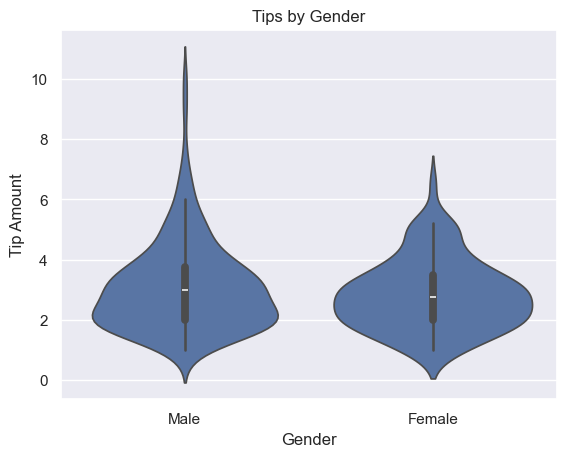

In [51]:
plt.clf() # Clear previous figure
violin = sns.violinplot(data = restaurant, x = "sex", y = "tip")
plt.xlabel("Gender")
plt.ylabel("Tip Amount")
plt.title("Tips by Gender")

### **Scatter Plot**

Text(0.5, 1.0, 'Total Bill vs. Tips')

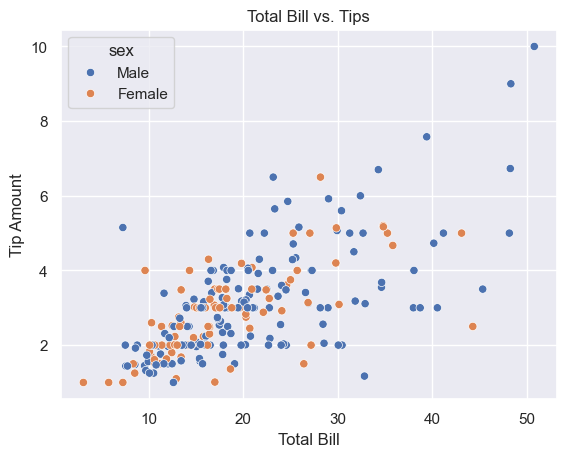

In [52]:
plt.clf() # Clear previous figure
scttr = sns.scatterplot(data = restaurant, x = "total_bill", y = "tip", hue = "sex") # Color points by gender
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Total Bill vs. Tips")

### **Using Correlation**

In [53]:
restaurant[['total_bill', 'tip']].corr().loc['total_bill', 'tip'] # Gets r value, not r^2, of total_bill and tip

0.6757341092113648

Text(0.5, 1.0, 'Total Bill vs. Tips')

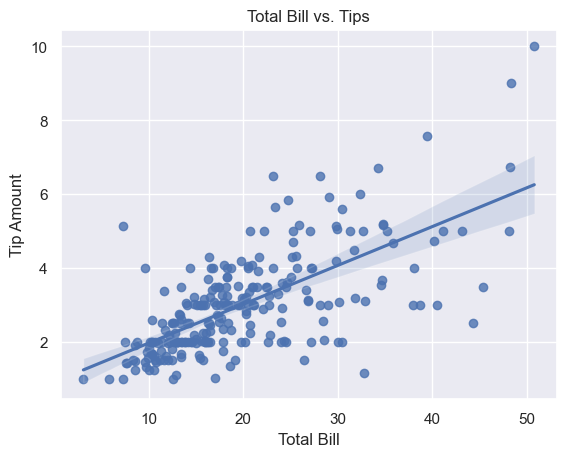

In [54]:
plt.clf() # Clear previous figure
reg = sns.regplot(data = restaurant, x = "total_bill", y = "tip") # Color points by gender
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Total Bill vs. Tips")

Text(0.5, 1.0, 'Total Bill vs. Tips')

<Figure size 640x480 with 0 Axes>

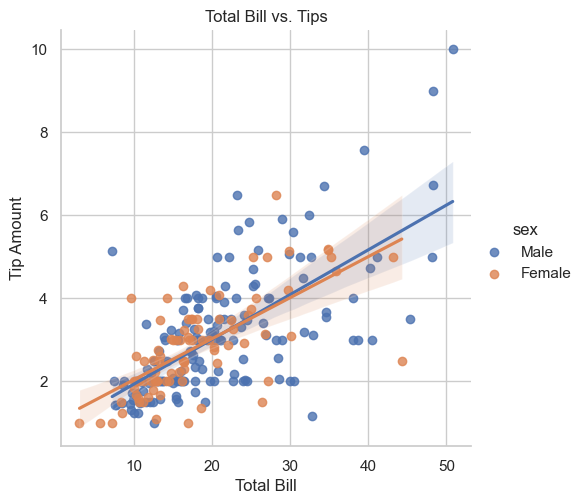

In [55]:
plt.clf() # Clear previous figure
sns.set_style('whitegrid')
reg_scttr = sns.lmplot(data = restaurant, x = "total_bill", y = "tip", hue = "sex") # Color points by gender
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Total Bill vs. Tips")

### **Bar Chart**

Text(0.5, 1.0, 'Days Visited by Gender')

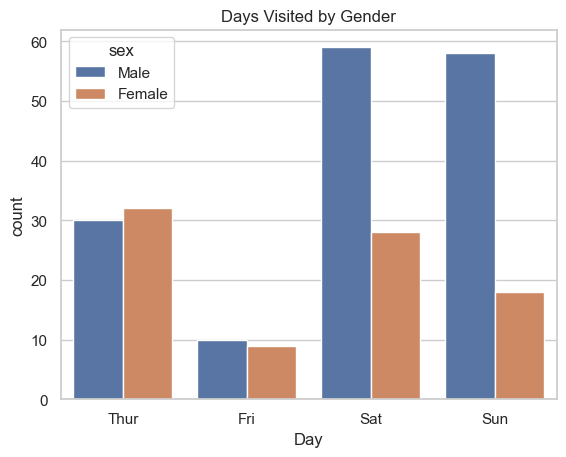

In [56]:
plt.clf() # Clear previous figure
sns.set_style('whitegrid')
restaurant = sns.load_dataset('tips')
freq_bar = sns.countplot(data = restaurant, x = 'day', hue = 'sex') # Color points by gender
plt.xlabel("Day")
plt.title("Days Visited by Gender")

### **Pie Chart**

C:\Users\Eric\AppData\Local\Temp\ipykernel_32124\2435692080.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days = restaurant.groupby('day').day.count()


Text(0.5, 1.0, 'Days Visited')

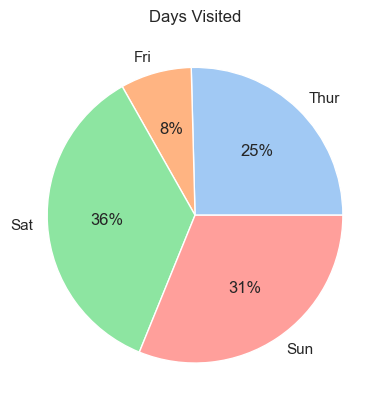

In [57]:
plt.clf() # Clear previous figure
days = restaurant.groupby('day').day.count()
new_colors = sns.color_palette('pastel')
plt.pie(days, labels = days.index, autopct='%.0f%%', colors = new_colors) # pyplot used
plt.title("Days Visited")

### **Pair Plot**

Text(0.45, 1.02, 'Pair Plot of Tips, Total Bill, and Party Size')

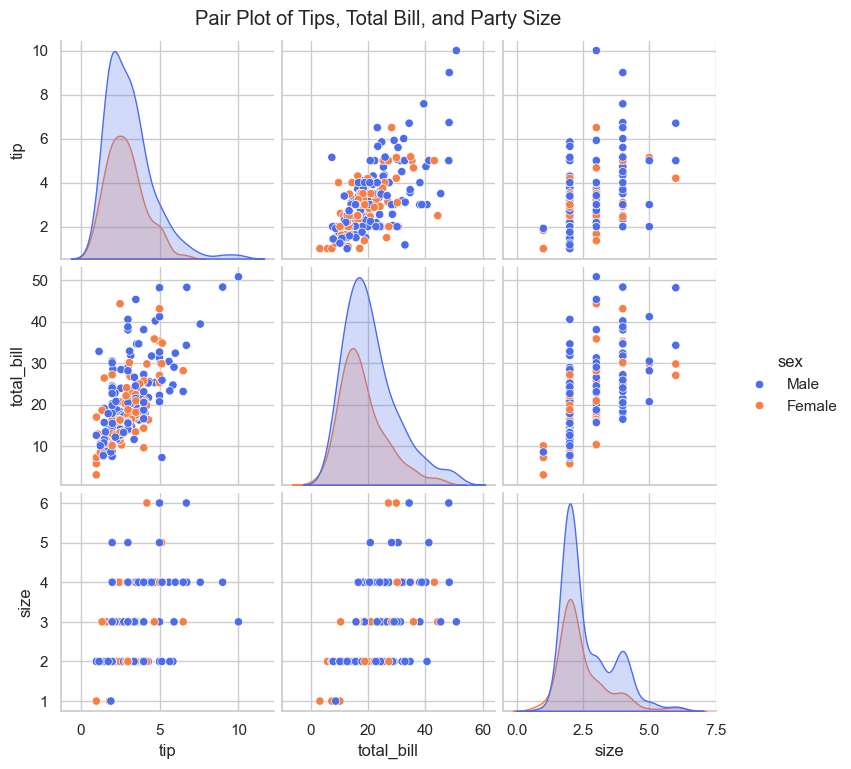

In [58]:
prp = sns.pairplot(data = restaurant,
             vars = ["tip", "total_bill", "size"],  # Data columns used
             kind = "scatter",                      # Kind of plots for different column pairs
             diag_kind = "kde",                     # Diagonal plot kind
             hue = "sex",                           # Color data by gender
             palette = my_colors[2:6:3])
plt.suptitle("Pair Plot of Tips, Total Bill, and Party Size", x = 0.45, y = 1.02)

### **Line Plot**

In [59]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Text(0.5, 1.0, 'Flights Time Series Data')

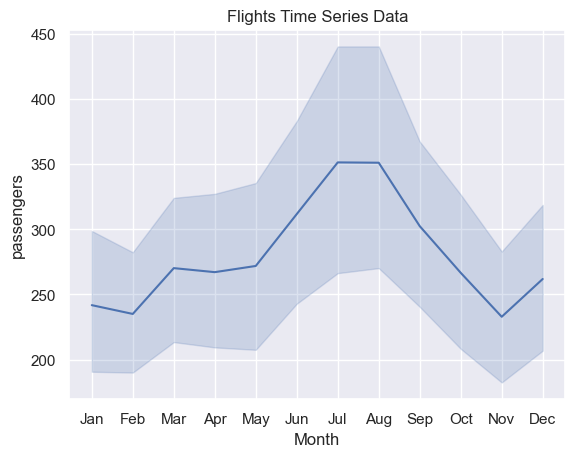

In [60]:
plt.clf() # Clear previous figure
sns.set()
time = sns.lineplot(data = flights, x = 'month', y = 'passengers')
plt.xlabel("Month")
plt.title("Flights Time Series Data")

<Figure size 640x480 with 0 Axes>

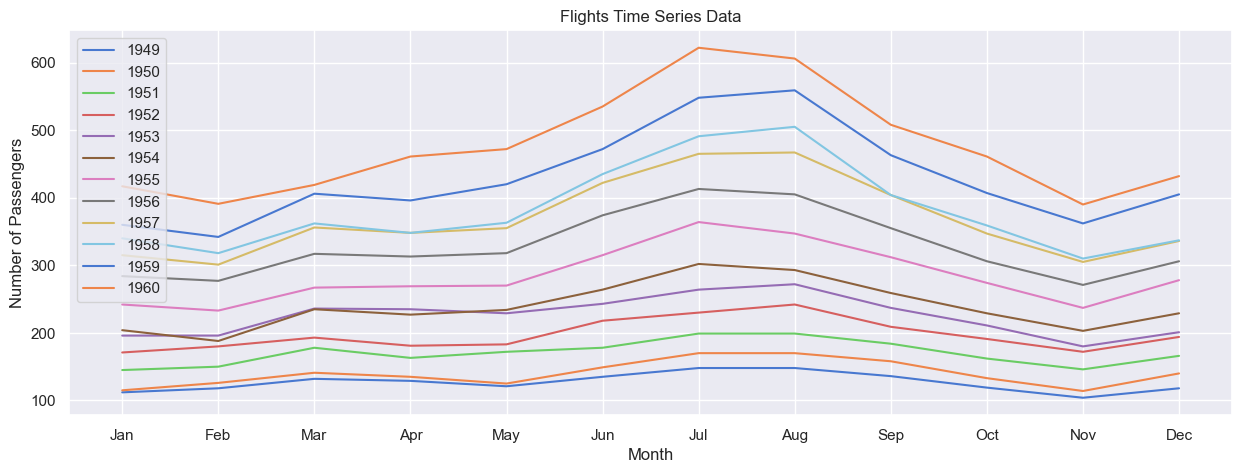

In [61]:
plt.clf() # Clear previous figure
plt.figure(figsize=(15,5))
time = sns.lineplot(data = flights, x = 'month', y = 'passengers', hue = 'year', palette = 'muted')
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.title("Flights Time Series Data")
plt.legend(loc='upper left')

### **Joint Plot**

In [62]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


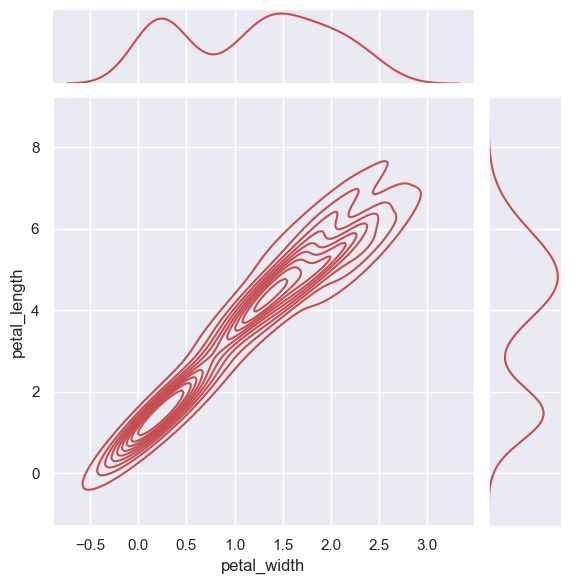

In [63]:
jnt1 = sns.jointplot(data = iris, x = "petal_width", y = "petal_length", kind = 'kde', color='r') # Kernel Density Est.
#plt.xlabel("Petal Width")
#plt.ylabel("Petal Length")
#plt.title("Joint Plot of Petal Width and Length")

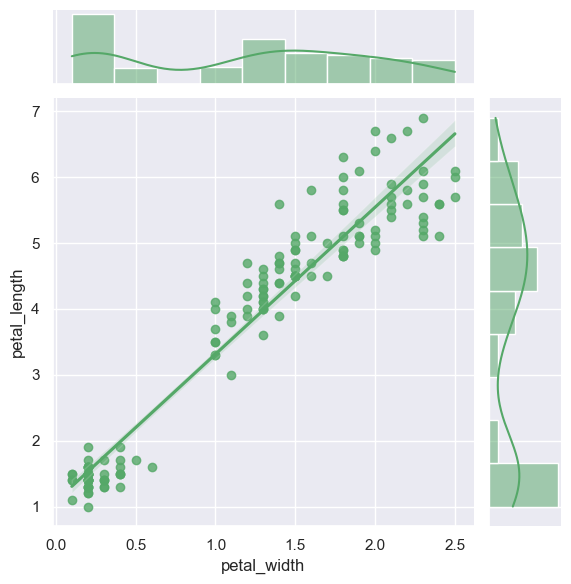

In [64]:
jnt2 = sns.jointplot(data = iris, x = "petal_width", y = "petal_length", kind = 'reg', color = 'g') # Regression

# **Advanced Plotting**

## **Subplots**

Matplotlib's may look like:

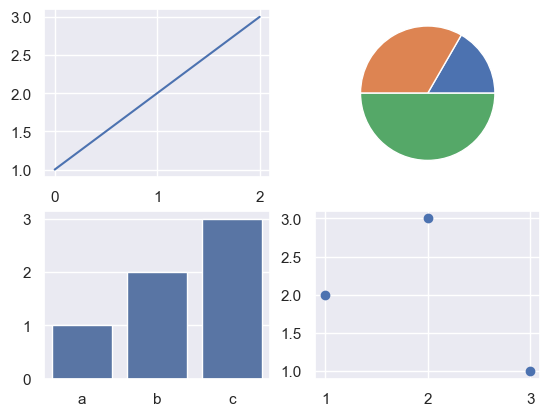

In [65]:
# subplots
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0][0].plot([1,2,3])
ax[0][1].pie([1,2,3])
sns.barplot(x=['a', 'b', 'c'], y=[1, 2, 3], ax=ax[1, 0])
ax[1][1].scatter([1,2,3], [2, 3, 1])

In [66]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Seaborn adds more functionality with ```FacetGrid()```

Text(0.5, 1.02, 'Sepal Length vs. Species')

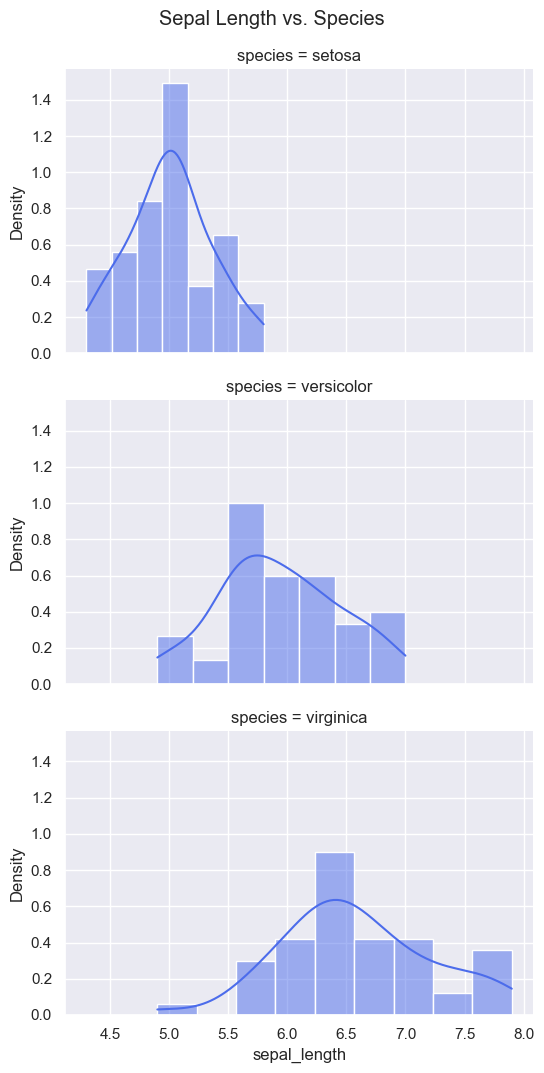

In [67]:
grid = sns.FacetGrid(iris, row='species',
                     height = 3.5, aspect = 1.6)
grid.map_dataframe(sns.histplot,
                   color = my_colors[2],
                   stat = "density", # Total area of bars is now 1
                   kde = True,
                   x = 'sepal_length')
plt.suptitle("Sepal Length vs. Species", x = 0.5, y = 1.02)

# Part 3: Data Preprocessing


Data preprocessing is the process of cleaning, organizing, and preparing raw data to enhance its quality and usability for analysis or machine learning. Preprocessing is an important step that occurs before the actual selection and training of the model.

You don't want to train a machine learning model with bad data (biased, lots of missing info, etc). If you feed a machine learning model biased or incomplete data, it will train on it, resulting in lower-quality models. "Garbage in, garbage out"



## Information about the dataset



We'll be using a dataset about King County (Seattle, Washington) Home Sales for this part of the tutorial.

**NOTE:** Because the dataset is too large to be uploaded to Github, you will need to download the dataset, name it `kingcountysales.csv`, and store it in your `nppd` folder to run the code below. You can refer to the dataset here: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction


In [68]:
home_sales = pd.read_csv('nppd/kingcountysales.csv', index_col = 0)
home_sales.head()

,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
1,1999..144,..2734100475,1999-01-05,150000,1,,demo,1999,47.544359,-122.320786,...,0,0,0,0,0,0,0,0,0,E
2,1999..258,..1535200725,1999-01-05,235000,1,,demo,1999,47.421247,-122.438139,...,0,0,2,0,0,0,0,0,0,H
3,1999..331,..6028000255,1999-01-04,293000,1,,demo,1999,47.572103,-122.122257,...,0,0,0,0,0,0,0,0,0,R
4,1999..660,..6145600690,1999-01-08,164000,1,,demo,1999,47.703824,-122.347166,...,0,0,0,0,0,0,0,0,0,B
5,1999..775,..1939800005,1999-01-07,270000,1,,demo,1999,47.764482,-122.208069,...,0,0,0,0,0,0,0,0,0,Q


As a review, running ```info()``` on the dataset allows you to see the total number of entries and the number of non-null entries for each column. Additionally, it gives the data type for each column feature. If the non-null count of a column doesn't equal the RangeIndex, there are obviously missing data values. In the home sales dataset, the "subdivision" category appears to be the only one with null values.

In [69]:
home_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560219 entries, 1 to 560219
Data columns (total 48 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sale_id           560219 non-null  object 
 1   pinx              560219 non-null  object 
 2   sale_date         560219 non-null  object 
 3   sale_price        560219 non-null  int64  
 4   sale_nbr          560219 non-null  int64  
 5   sale_warning      560219 non-null  object 
 6   join_status       560219 non-null  object 
 7   join_year         560219 non-null  int64  
 8   latitude          560219 non-null  float64
 9   longitude         560219 non-null  float64
 10  area              560219 non-null  int64  
 11  city              560219 non-null  object 
 12  zoning            560219 non-null  object 
 13  subdivision       510572 non-null  object 
 14  present_use       560219 non-null  int64  
 15  land_val          560219 non-null  int64  
 16  imp_val           560219 

We can access an individual column with the following command:
```df["column_name"]```

In [70]:
# Displays the "latitude" column
home_sales["latitude"]

1         47.544359
2         47.421247
3         47.572103
4         47.703824
5         47.764482
            ...    
560215    47.629275
560216    47.676524
560217    47.713828
560218    47.601373
560219    47.601373
Name: latitude, Length: 560219, dtype: float64

Unique values for a column can be found with: ```df["column_name"].value_counts()```

This is useful for finding the frequencies of each value in a feature.

In [71]:
# Counts the frequencies of each category in the "join_year" column
home_sales["join_year"].value_counts()

join_year
2022    527854
1999     32365
Name: count, dtype: int64

To find the entry at a specific row, ```loc['name']``` finds a location based on name, and ```iloc[pos]``` finds a row based on a numerical index.


In [72]:
# This code will display the 2nd entry (index=1 because of 0-indexing) of the dataset
home_sales.iloc[1]

sale_id                        1999..258
pinx                        ..1535200725
sale_date                     1999-01-05
sale_price                        235000
sale_nbr                               1
sale_warning                            
join_status                         demo
join_year                           1999
latitude                       47.421247
longitude                    -122.438139
area                                 100
city                         KING COUNTY
zoning                            RA2.5P
subdivision         CHAUTAUQUA BEACH ADD
present_use                            2
land_val                           46000
imp_val                           132000
year_built                          1916
year_reno                              0
sqft_lot                            6695
sqft                                 990
sqft_1                               990
sqft_fbsmt                             0
grade                                  6
fbsmt_grade     

In [73]:
# The name happens to be 1 for the row (NOTE THAT THIS IS NOT THE INDEX)
home_sales.loc[1]

sale_id                1999..144
pinx                ..2734100475
sale_date             1999-01-05
sale_price                150000
sale_nbr                       1
sale_warning                    
join_status                 demo
join_year                   1999
latitude               47.544359
longitude            -122.320786
area                          78
city                     SEATTLE
zoning                   SF 5000
subdivision           GEORGETOWN
present_use                    2
land_val                   21000
imp_val                    66000
year_built                  1900
year_reno                      0
sqft_lot                    4000
sqft                        1410
sqft_1                       760
sqft_fbsmt                     0
grade                          7
fbsmt_grade                    0
condition                      3
stories                      1.5
beds                           3
bath_full                      1
bath_3qtr                      0
bath_half 

**NOTE:** as seen above, for any dataframe `df` with numerical index names `i`, `df.iloc[i]` and `df.loc[i]` *MIGHT NOT BE THE SAME!!!* As we say with our example above, `home_sales.iloc[1]` gets the item at *index* 1 from our dataframe (remember that like most other Python storage, dataframes are 0-indexed, so we get our 2nd item from our dataset), while `home_sales.loc[1]` gets the item with *label* 1 (our *indeces* are 0-indexed, but because our *labels* are 1-indexed as set by the `index_col` parameter when reading our data, this means we're getting the item with *label* 1, so in this case we get the first item from our dataset).

## Null Values

When summing the null values present in the subdivision column, there are 49,647 null values. ```isna()``` labels each row as True or False based on whether it is null. When you use ```sum()```, it accumulates all True (null) values to get the total amount of values that are N/A.

In [74]:
home_sales["subdivision"].isna()

1         False
2         False
3         False
4         False
5         False
          ...  
560215    False
560216    False
560217    False
560218    False
560219    False
Name: subdivision, Length: 560219, dtype: bool

In [75]:
home_sales["subdivision"].isna().sum()

49647

It is important to address N/A values throughout the dataset. Using null values during the model training process gives an incomplete picture of the data and can potentially screw up results. There are multiple ways to address N/A values.

One approach is to simply delete all rows in the dataset that have a null value for that column. If there are many rows with null values in a column, doing this could significantly reduce your data entries and may not be feasible.

In [76]:
df = home_sales[home_sales['subdivision'].notna()]
df

,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
1,1999..144,..2734100475,1999-01-05,150000,1,,demo,1999,47.544359,-122.320786,...,0,0,0,0,0,0,0,0,0,E
2,1999..258,..1535200725,1999-01-05,235000,1,,demo,1999,47.421247,-122.438139,...,0,0,2,0,0,0,0,0,0,H
3,1999..331,..6028000255,1999-01-04,293000,1,,demo,1999,47.572103,-122.122257,...,0,0,0,0,0,0,0,0,0,R
4,1999..660,..6145600690,1999-01-08,164000,1,,demo,1999,47.703824,-122.347166,...,0,0,0,0,0,0,0,0,0,B
5,1999..775,..1939800005,1999-01-07,270000,1,,demo,1999,47.764482,-122.208069,...,0,0,0,0,0,0,0,0,0,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560215,2022..35230,..1337800060,2022-12-17,1750000,3,,reno - before,2022,47.629275,-122.307670,...,0,0,0,0,0,0,0,0,0,D
560216,2022..35574,..2856100991,2022-12-15,1250000,3,,reno - before,2022,47.676524,-122.392174,...,0,0,0,0,0,0,0,0,0,B
560217,2022..35591,..4430100010,2022-12-16,1268900,1,,reno - before,2022,47.713828,-122.361862,...,0,0,0,0,0,0,0,0,0,B
560218,2022..35644,..9253900030,2022-12-14,2300000,2,,reno - before,2022,47.601373,-122.112468,...,0,3,4,0,0,0,3,0,0,R


In [77]:
df = home_sales.dropna()
df

,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
1,1999..144,..2734100475,1999-01-05,150000,1,,demo,1999,47.544359,-122.320786,...,0,0,0,0,0,0,0,0,0,E
2,1999..258,..1535200725,1999-01-05,235000,1,,demo,1999,47.421247,-122.438139,...,0,0,2,0,0,0,0,0,0,H
3,1999..331,..6028000255,1999-01-04,293000,1,,demo,1999,47.572103,-122.122257,...,0,0,0,0,0,0,0,0,0,R
4,1999..660,..6145600690,1999-01-08,164000,1,,demo,1999,47.703824,-122.347166,...,0,0,0,0,0,0,0,0,0,B
5,1999..775,..1939800005,1999-01-07,270000,1,,demo,1999,47.764482,-122.208069,...,0,0,0,0,0,0,0,0,0,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560215,2022..35230,..1337800060,2022-12-17,1750000,3,,reno - before,2022,47.629275,-122.307670,...,0,0,0,0,0,0,0,0,0,D
560216,2022..35574,..2856100991,2022-12-15,1250000,3,,reno - before,2022,47.676524,-122.392174,...,0,0,0,0,0,0,0,0,0,B
560217,2022..35591,..4430100010,2022-12-16,1268900,1,,reno - before,2022,47.713828,-122.361862,...,0,0,0,0,0,0,0,0,0,B
560218,2022..35644,..9253900030,2022-12-14,2300000,2,,reno - before,2022,47.601373,-122.112468,...,0,3,4,0,0,0,3,0,0,R


An alternative approach is to fill missing rows with a certain value, such as -1, 0, the column ```mean()```, column ```median()```, or column ```mode()```. Hypothetically, if the sale_price had null values, we could just fill it with the median value (which is the metric often used in comparing housing prices)

In [78]:
# Nothing will happen since there are no null values
# But hypothetically, this is what you could do with null values
median_price = home_sales['sale_price'].median()
print(f"Median Price: {median_price}")

home_sales['sale_price'].fillna(median_price, inplace = True)
home_sales

Median Price: 442000.0


C:\Users\Eric\AppData\Local\Temp\ipykernel_32124\2489949512.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  home_sales['sale_price'].fillna(median_price, inplace = True)


,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
1,1999..144,..2734100475,1999-01-05,150000,1,,demo,1999,47.544359,-122.320786,...,0,0,0,0,0,0,0,0,0,E
2,1999..258,..1535200725,1999-01-05,235000,1,,demo,1999,47.421247,-122.438139,...,0,0,2,0,0,0,0,0,0,H
3,1999..331,..6028000255,1999-01-04,293000,1,,demo,1999,47.572103,-122.122257,...,0,0,0,0,0,0,0,0,0,R
4,1999..660,..6145600690,1999-01-08,164000,1,,demo,1999,47.703824,-122.347166,...,0,0,0,0,0,0,0,0,0,B
5,1999..775,..1939800005,1999-01-07,270000,1,,demo,1999,47.764482,-122.208069,...,0,0,0,0,0,0,0,0,0,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560215,2022..35230,..1337800060,2022-12-17,1750000,3,,reno - before,2022,47.629275,-122.307670,...,0,0,0,0,0,0,0,0,0,D
560216,2022..35574,..2856100991,2022-12-15,1250000,3,,reno - before,2022,47.676524,-122.392174,...,0,0,0,0,0,0,0,0,0,B
560217,2022..35591,..4430100010,2022-12-16,1268900,1,,reno - before,2022,47.713828,-122.361862,...,0,0,0,0,0,0,0,0,0,B
560218,2022..35644,..9253900030,2022-12-14,2300000,2,,reno - before,2022,47.601373,-122.112468,...,0,3,4,0,0,0,3,0,0,R


## Duplicate Values

Duplicate entries in our dataset should also be dealt with before modeling. ```duplicated()``` checks for duplicates.

In [79]:
# Prints boolean values on whether each row is duplicated
print(home_sales.duplicated())

# Prints dataframe of duplicate values
# The \n is just to add lines between the two print outputs
print("\n\n",home_sales[home_sales.duplicated()])

1         False
2         False
3         False
4         False
5         False
          ...  
560215    False
560216    False
560217    False
560218    False
560219    False
Length: 560219, dtype: bool


 Empty DataFrame
Columns: [sale_id, pinx, sale_date, sale_price, sale_nbr, sale_warning, join_status, join_year, latitude, longitude, area, city, zoning, subdivision, present_use, land_val, imp_val, year_built, year_reno, sqft_lot, sqft, sqft_1, sqft_fbsmt, grade, fbsmt_grade, condition, stories, beds, bath_full, bath_3qtr, bath_half, garb_sqft, gara_sqft, wfnt, golf, greenbelt, noise_traffic, view_rainier, view_olympics, view_cascades, view_territorial, view_skyline, view_sound, view_lakewash, view_lakesamm, view_otherwater, view_other, submarket]
Index: []

[0 rows x 48 columns]


Luckily, there doesn't seem to be any duplicated values in our dataset. Hypothetically, though, you could delete duplicate values with ```drop_duplicates()```.

In [80]:
# Drops duplicates and directly modifies the dataset.
# Nothing will happen in this case since there are no duplicates to begin with.
home_sales.drop_duplicates(inplace = True)
home_sales

,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
1,1999..144,..2734100475,1999-01-05,150000,1,,demo,1999,47.544359,-122.320786,...,0,0,0,0,0,0,0,0,0,E
2,1999..258,..1535200725,1999-01-05,235000,1,,demo,1999,47.421247,-122.438139,...,0,0,2,0,0,0,0,0,0,H
3,1999..331,..6028000255,1999-01-04,293000,1,,demo,1999,47.572103,-122.122257,...,0,0,0,0,0,0,0,0,0,R
4,1999..660,..6145600690,1999-01-08,164000,1,,demo,1999,47.703824,-122.347166,...,0,0,0,0,0,0,0,0,0,B
5,1999..775,..1939800005,1999-01-07,270000,1,,demo,1999,47.764482,-122.208069,...,0,0,0,0,0,0,0,0,0,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560215,2022..35230,..1337800060,2022-12-17,1750000,3,,reno - before,2022,47.629275,-122.307670,...,0,0,0,0,0,0,0,0,0,D
560216,2022..35574,..2856100991,2022-12-15,1250000,3,,reno - before,2022,47.676524,-122.392174,...,0,0,0,0,0,0,0,0,0,B
560217,2022..35591,..4430100010,2022-12-16,1268900,1,,reno - before,2022,47.713828,-122.361862,...,0,0,0,0,0,0,0,0,0,B
560218,2022..35644,..9253900030,2022-12-14,2300000,2,,reno - before,2022,47.601373,-122.112468,...,0,3,4,0,0,0,3,0,0,R


## Categorical Features

You may have noticed that some of the columns in the dataset, such as join_year, join_status, and submarket, have categorical values instead of quantitative. Machine learning models operate on mathematical equations, and categorical variables, like words or labels, don't fit neatly into these equations. Before feeding data into a model, we need to convert categorical variables into numerical representations, a process known as encoding. This allows the model to grasp the relationships and patterns within the data.

Before we get into encoding, we can import a library called Scikit-learn to help. Scikit-learn is a popular machine learning library in Python that provides simple and efficient tools for data analysis and modeling. It offers a wide range of algorithms for tasks such as classification, regression, clustering, dimensionality reduction, and more. It also provides utilities for data preprocessing, model evaluation, and model selection.

**NOTE:** Normally, we would want to avoid importing `sklearn` as a whole, because this imports *everything* from the `sklearn` library (classes, functions, etc.), which can make it difficult if we end up defining something the same as `sklearn`. Ideally, we would just want to call *only* the functions you want (so as an example with our next section, if we want to use `LabelEncoder`, instead of importing the whole library, we instead call `from sklearn.preprocessing import LabelEncoder`).


In [81]:
# imports scikit-learn
import sklearn

### Label Encoding

In label encoding, each unique category or label is assigned a unique integer or numerical value. This is a straightforward approach where the assigned numbers are often arbitrary and don't imply any inherent order. One downside is that for some algorithms, the encoded values might be misunderstood as ordinal, introducing unintended relationships that don't exist in the original data.

In [82]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Transform the data and add to new column
home_sales['submarket_encoded'] = label_encoder.fit_transform(home_sales['submarket'])

# Usually you would replace the original submarket, but we need it in this examples to demonstrate other encoding methods
home_sales

,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket,submarket_encoded
1,1999..144,..2734100475,1999-01-05,150000,1,,demo,1999,47.544359,-122.320786,...,0,0,0,0,0,0,0,0,E,4
2,1999..258,..1535200725,1999-01-05,235000,1,,demo,1999,47.421247,-122.438139,...,0,2,0,0,0,0,0,0,H,7
3,1999..331,..6028000255,1999-01-04,293000,1,,demo,1999,47.572103,-122.122257,...,0,0,0,0,0,0,0,0,R,17
4,1999..660,..6145600690,1999-01-08,164000,1,,demo,1999,47.703824,-122.347166,...,0,0,0,0,0,0,0,0,B,1
5,1999..775,..1939800005,1999-01-07,270000,1,,demo,1999,47.764482,-122.208069,...,0,0,0,0,0,0,0,0,Q,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560215,2022..35230,..1337800060,2022-12-17,1750000,3,,reno - before,2022,47.629275,-122.307670,...,0,0,0,0,0,0,0,0,D,3
560216,2022..35574,..2856100991,2022-12-15,1250000,3,,reno - before,2022,47.676524,-122.392174,...,0,0,0,0,0,0,0,0,B,1
560217,2022..35591,..4430100010,2022-12-16,1268900,1,,reno - before,2022,47.713828,-122.361862,...,0,0,0,0,0,0,0,0,B,1
560218,2022..35644,..9253900030,2022-12-14,2300000,2,,reno - before,2022,47.601373,-122.112468,...,3,4,0,0,0,3,0,0,R,17


### Ordinal Encoding

Ordinal encoding is a technique used to convert categorical variables with ordinal relationships into numerical representations. Unlike nominal encoding methods (like label encoding), ordinal encoding considers the inherent order or ranking among the categories. For example, categories like 'low,' 'medium,' and 'high' have a clear order.


In [83]:
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder instance
year_order = [1999, 2022]
ordinal_encoder = OrdinalEncoder(categories=[year_order])

# Transform the data and add to new column
home_sales['join_year_encoded'] = ordinal_encoder.fit_transform(home_sales[['join_year']])

# Usually you would replace the original submarket, but we need it in this examples to demonstrate other encoding methods
home_sales

,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket,submarket_encoded,join_year_encoded
1,1999..144,..2734100475,1999-01-05,150000,1,,demo,1999,47.544359,-122.320786,...,0,0,0,0,0,0,0,E,4,0.0
2,1999..258,..1535200725,1999-01-05,235000,1,,demo,1999,47.421247,-122.438139,...,2,0,0,0,0,0,0,H,7,0.0
3,1999..331,..6028000255,1999-01-04,293000,1,,demo,1999,47.572103,-122.122257,...,0,0,0,0,0,0,0,R,17,0.0
4,1999..660,..6145600690,1999-01-08,164000,1,,demo,1999,47.703824,-122.347166,...,0,0,0,0,0,0,0,B,1,0.0
5,1999..775,..1939800005,1999-01-07,270000,1,,demo,1999,47.764482,-122.208069,...,0,0,0,0,0,0,0,Q,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560215,2022..35230,..1337800060,2022-12-17,1750000,3,,reno - before,2022,47.629275,-122.307670,...,0,0,0,0,0,0,0,D,3,1.0
560216,2022..35574,..2856100991,2022-12-15,1250000,3,,reno - before,2022,47.676524,-122.392174,...,0,0,0,0,0,0,0,B,1,1.0
560217,2022..35591,..4430100010,2022-12-16,1268900,1,,reno - before,2022,47.713828,-122.361862,...,0,0,0,0,0,0,0,B,1,1.0
560218,2022..35644,..9253900030,2022-12-14,2300000,2,,reno - before,2022,47.601373,-122.112468,...,4,0,0,0,3,0,0,R,17,1.0


### One-Hot Encoding

In this encoding scheme, each category is transformed into a separate binary dummy column, and only one of these columns contains a "1" to indicate the presence of that category, while the others contain "0s." Since each category is its own column, One-Hot Encoding can lead to a large number of features, which might be impractical for certain datasets.

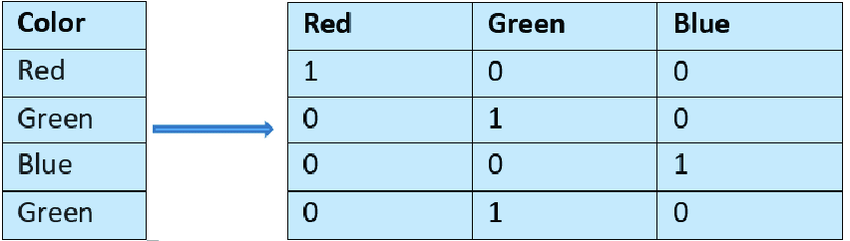

In [84]:
IPython.display.Image('nppd/one-hot-encoding.png')

Running the ```nunique()``` command, we can see that there are 19 unique values in the "submarket" feature. With one-hot encoding, this creates 19 new columns, one for each value. You can drop the original column after encoding.

In [85]:
home_sales['submarket'].nunique()

19

In [86]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder instance
encoder = OneHotEncoder()

# Create dummy variables into a dataframe
# Since there are no null values, a variable for na is not needed
submarket_encoded = pd.get_dummies(home_sales['submarket'], dummy_na=False, prefix="submarket")

# Concatenate the dataframe into another df
df = pd.concat([home_sales, submarket_encoded], axis=1)

# Drop the old column
df.drop('submarket', axis=1, inplace=True)

df


,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,submarket_J,submarket_K,submarket_L,submarket_M,submarket_N,submarket_O,submarket_P,submarket_Q,submarket_R,submarket_S
1,1999..144,..2734100475,1999-01-05,150000,1,,demo,1999,47.544359,-122.320786,...,False,False,False,False,False,False,False,False,False,False
2,1999..258,..1535200725,1999-01-05,235000,1,,demo,1999,47.421247,-122.438139,...,False,False,False,False,False,False,False,False,False,False
3,1999..331,..6028000255,1999-01-04,293000,1,,demo,1999,47.572103,-122.122257,...,False,False,False,False,False,False,False,False,True,False
4,1999..660,..6145600690,1999-01-08,164000,1,,demo,1999,47.703824,-122.347166,...,False,False,False,False,False,False,False,False,False,False
5,1999..775,..1939800005,1999-01-07,270000,1,,demo,1999,47.764482,-122.208069,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560215,2022..35230,..1337800060,2022-12-17,1750000,3,,reno - before,2022,47.629275,-122.307670,...,False,False,False,False,False,False,False,False,False,False
560216,2022..35574,..2856100991,2022-12-15,1250000,3,,reno - before,2022,47.676524,-122.392174,...,False,False,False,False,False,False,False,False,False,False
560217,2022..35591,..4430100010,2022-12-16,1268900,1,,reno - before,2022,47.713828,-122.361862,...,False,False,False,False,False,False,False,False,False,False
560218,2022..35644,..9253900030,2022-12-14,2300000,2,,reno - before,2022,47.601373,-122.112468,...,False,False,False,False,False,False,False,False,True,False


Sometimes, people will drop the first encoded column to avoid the "dummy variable trap." The dummy variable trap occurs when the values of one variable can be predicted from the values of the other variables. In the context of one-hot encoding, if you have N categories, you can represent them with N-1 binary columns without losing information. You can do this by setting ```drop_first``` to True

In [87]:
# Create dummy variables while dropping the first into a dataframe
submarket_encoded = pd.get_dummies(home_sales['submarket'], dummy_na=False, prefix="submarket", drop_first=True)

# Concatenate the dataframe into another df
df = pd.concat([home_sales, submarket_encoded], axis=1)

# Drop the old column
df.drop('submarket', axis=1, inplace=True)

df

,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,submarket_J,submarket_K,submarket_L,submarket_M,submarket_N,submarket_O,submarket_P,submarket_Q,submarket_R,submarket_S
1,1999..144,..2734100475,1999-01-05,150000,1,,demo,1999,47.544359,-122.320786,...,False,False,False,False,False,False,False,False,False,False
2,1999..258,..1535200725,1999-01-05,235000,1,,demo,1999,47.421247,-122.438139,...,False,False,False,False,False,False,False,False,False,False
3,1999..331,..6028000255,1999-01-04,293000,1,,demo,1999,47.572103,-122.122257,...,False,False,False,False,False,False,False,False,True,False
4,1999..660,..6145600690,1999-01-08,164000,1,,demo,1999,47.703824,-122.347166,...,False,False,False,False,False,False,False,False,False,False
5,1999..775,..1939800005,1999-01-07,270000,1,,demo,1999,47.764482,-122.208069,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560215,2022..35230,..1337800060,2022-12-17,1750000,3,,reno - before,2022,47.629275,-122.307670,...,False,False,False,False,False,False,False,False,False,False
560216,2022..35574,..2856100991,2022-12-15,1250000,3,,reno - before,2022,47.676524,-122.392174,...,False,False,False,False,False,False,False,False,False,False
560217,2022..35591,..4430100010,2022-12-16,1268900,1,,reno - before,2022,47.713828,-122.361862,...,False,False,False,False,False,False,False,False,False,False
560218,2022..35644,..9253900030,2022-12-14,2300000,2,,reno - before,2022,47.601373,-122.112468,...,False,False,False,False,False,False,False,False,True,False


## Feature Scaling

Feature scaling is a preprocessing technique in machine learning that standardizes or normalizes the range of quantitative independent variables or features of the dataset. The goal is to ensure that no single feature dominates the others and that algorithms can converge faster and perform more reliably. There are many ways to scale features.

One common method of feature scaling is Min-Max Scaling, and in scikit-learn, you can use the ```MinMaxScaler``` for this purpose. Min-Max Scaling transforms the data in a way that it is scaled to a specific range, usually [0, 1].

In [88]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMax Scaler
scaler = MinMaxScaler()

# Make copy of df so we can try out multiple scalers without affecting original
df = home_sales.copy()

# Transform and scale the column
df["sale_price"] = scaler.fit_transform(df[["sale_price"]])
df

,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket,submarket_encoded,join_year_encoded
1,1999..144,..2734100475,1999-01-05,0.003121,1,,demo,1999,47.544359,-122.320786,...,0,0,0,0,0,0,0,E,4,0.0
2,1999..258,..1535200725,1999-01-05,0.005781,1,,demo,1999,47.421247,-122.438139,...,2,0,0,0,0,0,0,H,7,0.0
3,1999..331,..6028000255,1999-01-04,0.007597,1,,demo,1999,47.572103,-122.122257,...,0,0,0,0,0,0,0,R,17,0.0
4,1999..660,..6145600690,1999-01-08,0.003559,1,,demo,1999,47.703824,-122.347166,...,0,0,0,0,0,0,0,B,1,0.0
5,1999..775,..1939800005,1999-01-07,0.006877,1,,demo,1999,47.764482,-122.208069,...,0,0,0,0,0,0,0,Q,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560215,2022..35230,..1337800060,2022-12-17,0.053199,3,,reno - before,2022,47.629275,-122.307670,...,0,0,0,0,0,0,0,D,3,1.0
560216,2022..35574,..2856100991,2022-12-15,0.037550,3,,reno - before,2022,47.676524,-122.392174,...,0,0,0,0,0,0,0,B,1,1.0
560217,2022..35591,..4430100010,2022-12-16,0.038141,1,,reno - before,2022,47.713828,-122.361862,...,0,0,0,0,0,0,0,B,1,1.0
560218,2022..35644,..9253900030,2022-12-14,0.070414,2,,reno - before,2022,47.601373,-122.112468,...,4,0,0,0,3,0,0,R,17,1.0


A common alternative to scaling based on the min and the max is to scale based on standard deviations. This scales the data to have a mean of 0. Think z-scores.

Standardization is less sensitive to outliers compared to Min-Max scaling, making it more robust in the presence of extreme values.

In [89]:
from sklearn.preprocessing import StandardScaler

# Initialize Standard Scaler
standard_scaler = StandardScaler()

# Make copy of df so we can try out multiple scalers without affecting original
df = home_sales.copy()

# Transform and scale the column
df["sale_price"] = standard_scaler.fit_transform(df[["sale_price"]])
df

,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket,submarket_encoded,join_year_encoded
1,1999..144,..2734100475,1999-01-05,-0.843722,1,,demo,1999,47.544359,-122.320786,...,0,0,0,0,0,0,0,E,4,0.0
2,1999..258,..1535200725,1999-01-05,-0.675719,1,,demo,1999,47.421247,-122.438139,...,2,0,0,0,0,0,0,H,7,0.0
3,1999..331,..6028000255,1999-01-04,-0.561082,1,,demo,1999,47.572103,-122.122257,...,0,0,0,0,0,0,0,R,17,0.0
4,1999..660,..6145600690,1999-01-08,-0.816051,1,,demo,1999,47.703824,-122.347166,...,0,0,0,0,0,0,0,B,1,0.0
5,1999..775,..1939800005,1999-01-07,-0.606542,1,,demo,1999,47.764482,-122.208069,...,0,0,0,0,0,0,0,Q,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560215,2022..35230,..1337800060,2022-12-17,2.318678,3,,reno - before,2022,47.629275,-122.307670,...,0,0,0,0,0,0,0,D,3,1.0
560216,2022..35574,..2856100991,2022-12-15,1.330428,3,,reno - before,2022,47.676524,-122.392174,...,0,0,0,0,0,0,0,B,1,1.0
560217,2022..35591,..4430100010,2022-12-16,1.367784,1,,reno - before,2022,47.713828,-122.361862,...,0,0,0,0,0,0,0,B,1,1.0
560218,2022..35644,..9253900030,2022-12-14,3.405752,2,,reno - before,2022,47.601373,-122.112468,...,4,0,0,0,3,0,0,R,17,1.0


## Feature Selection

Feature selection is a process in machine learning where a subset of features or variables is chosen from a larger set of features. The goal of feature selection is to improve the model's performance, reduce overfitting, and enhance interpretability by focusing on the most informative features while discarding irrelevant or redundant ones.

There are many techniques to automatically do this, but you can also use domain knowledge (expertise on the subject matter) to manually evaluate features when practical.

For instance, the ```sale_id``` is likely to be insignificant in predicting something like housing prices. Even though it includes the sale year, we already have a column/feature for sale date (which includes the year), so it's fine to drop the ```sale_id``` column.

In [90]:
# drop the sale_id column. Setting inplace to true directly modifies the existing dataframe.
home_sales.drop(columns="sale_id", inplace = True)
home_sales

,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,...,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket,submarket_encoded,join_year_encoded
1,..2734100475,1999-01-05,150000,1,,demo,1999,47.544359,-122.320786,78,...,0,0,0,0,0,0,0,E,4,0.0
2,..1535200725,1999-01-05,235000,1,,demo,1999,47.421247,-122.438139,100,...,2,0,0,0,0,0,0,H,7,0.0
3,..6028000255,1999-01-04,293000,1,,demo,1999,47.572103,-122.122257,31,...,0,0,0,0,0,0,0,R,17,0.0
4,..6145600690,1999-01-08,164000,1,,demo,1999,47.703824,-122.347166,5,...,0,0,0,0,0,0,0,B,1,0.0
5,..1939800005,1999-01-07,270000,1,,demo,1999,47.764482,-122.208069,38,...,0,0,0,0,0,0,0,Q,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560215,..1337800060,2022-12-17,1750000,3,,reno - before,2022,47.629275,-122.307670,13,...,0,0,0,0,0,0,0,D,3,1.0
560216,..2856100991,2022-12-15,1250000,3,,reno - before,2022,47.676524,-122.392174,19,...,0,0,0,0,0,0,0,B,1,1.0
560217,..4430100010,2022-12-16,1268900,1,,reno - before,2022,47.713828,-122.361862,39,...,0,0,0,0,0,0,0,B,1,1.0
560218,..9253900030,2022-12-14,2300000,2,,reno - before,2022,47.601373,-122.112468,47,...,4,0,0,0,3,0,0,R,17,1.0


## Train Test Split

Splitting the data into training and test sets is a crucial step in machine learning. The primary purpose of splitting the data is to evaluate the model's performance on data it has never seen before. The test set serves as new, unseen data, allowing you to assess how well your model generalizes to real-world scenarios.

Overfitting occurs when a model learns the training data too well, including its noise and specific patterns that do not generalize to new data. By evaluating the model on a separate test set, you can also identify if the model is overfitting and make adjustments accordingly.

It is also often recommended to use a validation set before the test set, especially when tuning hyperparameters or selecting between different machine learning models. The validation set helps you assess how well the model performs on data it was not trained on, guiding the selection of hyperparameters or models that generalize well, while also allowing the test set to remain a truly objective measure for evaluation.



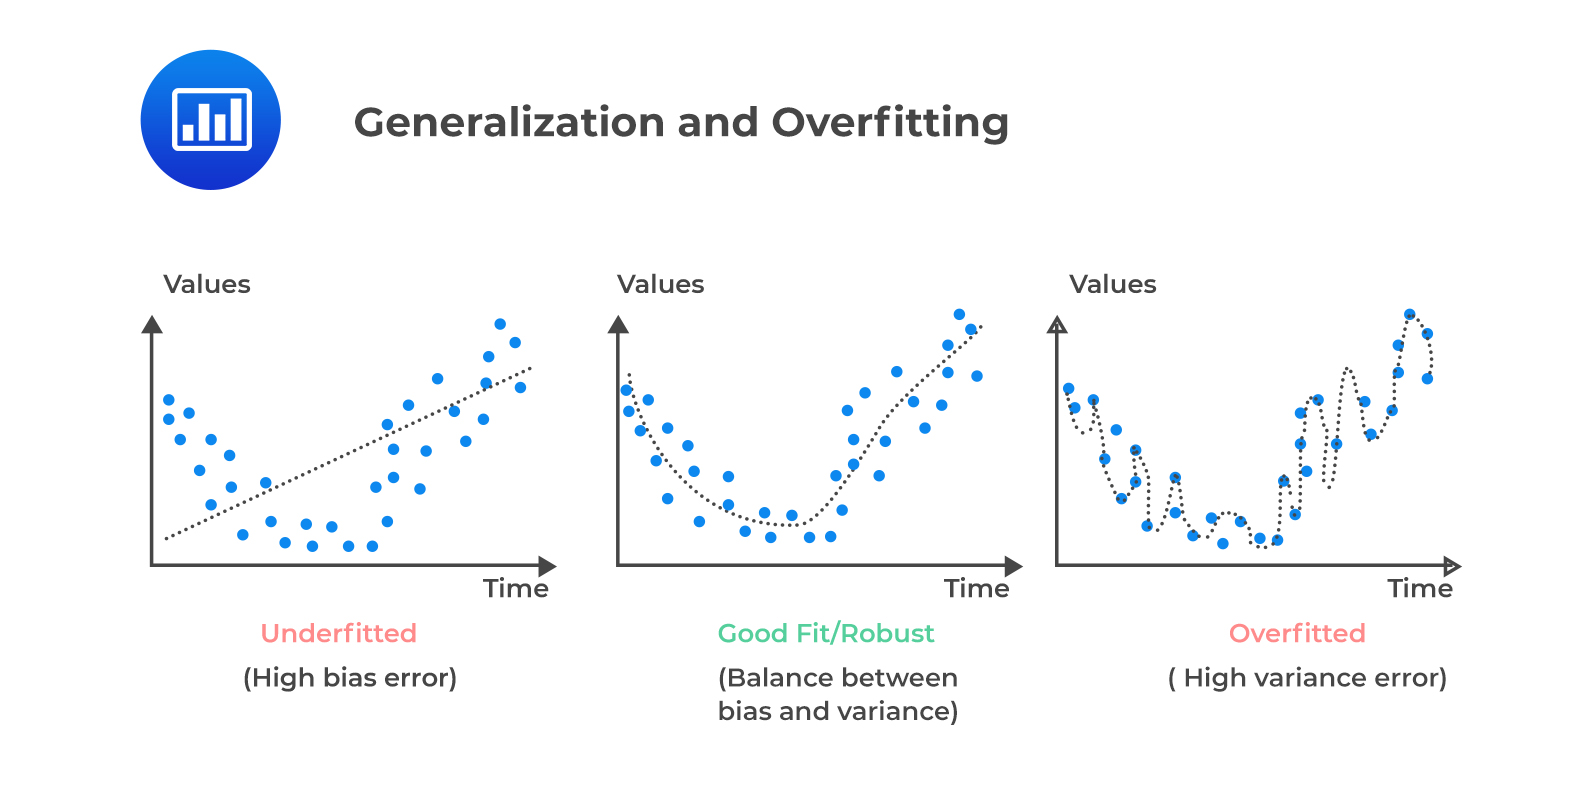

In [91]:
IPython.display.Image("nppd/overfitting.jpg")

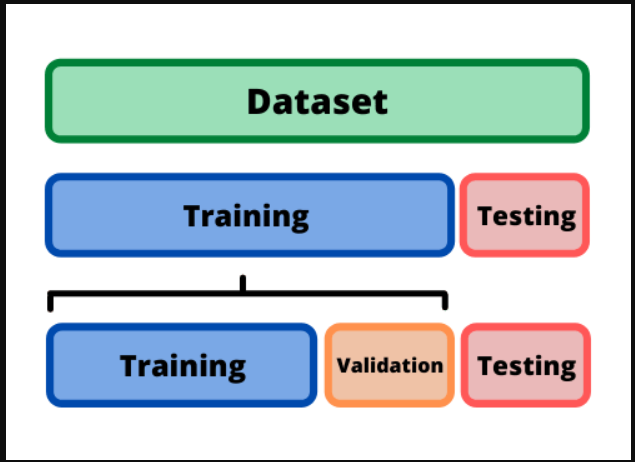

In [92]:
IPython.display.Image("nppd/train_test.png")

In addition to a single train-test split, techniques like k-fold cross-validation further enhance model evaluation. Cross-validation provides a more robust estimate of a model's performance by partitioning the data into multiple subsets for training and testing.

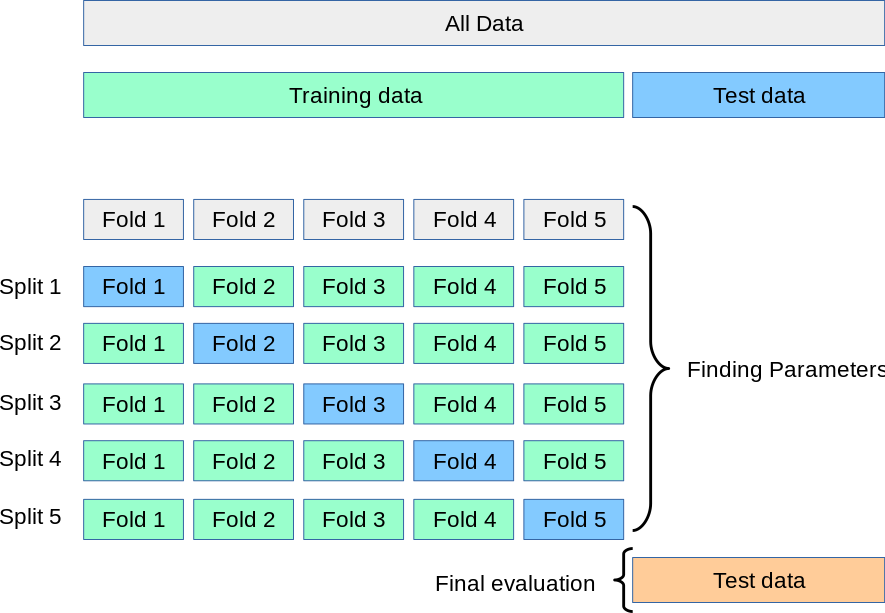

In [93]:
IPython.display.Image("nppd/k_fold_cross_validation.png")

You can use Scikit-learn's ```train_test_split``` to automatically split the data into different sets for you. The exact train-test split proportions can vary based on the project and amount of data available, but it is typically 70-30 or 80-20.

Before we use the ```train_test_split``` function, we will have to separate our dataframe into one for input features and one for labels (what we're predicting, which in this case is sale prices).

In [94]:
from sklearn.model_selection import train_test_split

# Note that this is typically done after data processing.
# We did not complete the preprocessing of the dataset, but we'll do this anyway to show how it's used.

# All dataframe columns except for the sale prices.
X = home_sales.drop('sale_price', axis=1)

# Sale prices
y = home_sales[['sale_price']]

# In this case, we are setting test_size to 20% of the data. The other 80% is used for training.
# Each random state provides a different "randomized" variation of split.
# By keeping the state constant, we ensure that we'll get the same split every time this is run, allowing for consistency later during testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
# Features of training set
X_train

,pinx,sale_date,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,city,...,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket,submarket_encoded,join_year_encoded
27447,..3649100110,2013-11-26,2,,reno - before,1999,47.740378,-122.246118,37,KENMORE,...,0,0,0,0,0,0,0,Q,16,0.0
379374,..4213500010,2022-03-11,4,,nochg,2022,47.726219,-121.962350,70,DUVALL,...,0,0,0,0,0,0,0,N,13,1.0
3009,..5151200485,2009-07-10,1,,demo,1999,47.730085,-122.360539,5,SEATTLE,...,0,0,0,0,0,0,0,B,1,0.0
255155,..2221000100,2014-05-07,3,,nochg,2022,47.429021,-122.154172,51,KING COUNTY,...,0,0,0,0,0,0,0,K,10,1.0
424609,..8857640170,2005-08-02,3,41,new,2022,47.388834,-122.032234,56,MAPLE VALLEY,...,0,0,0,0,0,0,0,M,12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110269,..6015500060,2003-06-11,1,,nochg,2022,47.689061,-122.287137,45,SEATTLE,...,0,0,0,0,0,0,0,C,2,1.0
259179,..1117200190,2014-08-04,1,,nochg,2022,47.644349,-121.999137,71,KING COUNTY,...,0,0,0,0,0,0,0,O,14,1.0
365839,..1926069045,2021-06-16,1,,nochg,2022,47.721308,-122.087788,72,KING COUNTY,...,0,0,0,0,0,0,0,P,15,1.0
131933,..8651411440,2004-06-21,1,,nochg,2022,47.368486,-122.080066,86,COVINGTON,...,0,0,0,0,0,0,0,K,10,1.0


In [96]:
# Features of the test set
X_test

,pinx,sale_date,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,city,...,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket,submarket_encoded,join_year_encoded
17491,..3592501046,1999-12-22,1,,reno - before,1999,47.634102,-122.305615,13,SEATTLE,...,0,0,0,0,0,0,0,D,3,0.0
452879,..4307300150,2010-01-15,3,,new,2022,47.483344,-122.183486,85,RENTON,...,0,0,0,0,0,0,0,K,10,1.0
53908,..9477201480,2000-02-28,1,,nochg,2022,47.727965,-122.191930,73,KIRKLAND,...,0,0,0,0,0,0,0,Q,16,1.0
26085,..3972300075,2010-08-23,3,,reno - before,1999,47.768914,-122.317924,3,SHORELINE,...,0,0,0,0,0,0,0,A,0,0.0
5820,..4389200640,2002-07-15,1,,rebuilt - before,1999,47.615533,-122.208748,33,BELLEVUE,...,0,0,0,0,0,0,0,S,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87990,..9500900115,2002-02-21,1,,nochg,2022,47.287108,-122.212752,28,AUBURN,...,0,0,0,0,0,0,0,L,11,1.0
395054,..2560804000,2000-07-25,1,,miss99,2022,47.377292,-122.319010,88,DES MOINES,...,0,0,0,0,0,0,0,I,8,1.0
167044,..2558650260,2006-03-16,1,,nochg,2022,47.721856,-122.166851,73,KIRKLAND,...,0,0,0,0,0,0,0,Q,16,1.0
357301,..9264960080,2020-12-14,3,,nochg,2022,47.301642,-122.350931,54,FEDERAL WAY,...,0,0,0,0,0,0,0,I,8,1.0


In [97]:
# labels of training set
y_train

,sale_price
27447,399000
379374,1300000
3009,344995
255155,310000
424609,494500
...,...
110269,425000
259179,775000
365839,1325000
131933,150000


In [98]:
# labels of test set
y_test

,sale_price
17491,688000
452879,325000
53908,204000
26085,293900
5820,749000
...,...
87990,169950
395054,172000
167044,450000
357301,590000


# Part 4: Data Analysis

Note that there was a reason we first discussed visualziation and preprocessing before analysis. That's because data analysis incorporates both elements to be able to make sense of the data! This is an important component in ML, since it allows us to gain insights on our data before even running it through a model.

In short, data analysis is sort-of like the thread tying up preprocessing and visualization together! It's an important component both before *and* after running a machine learning model through our data.

First, we begin by cleaning our data. We ideally want to clean our data to be able to either remove values that are missing values/erroneous or to use other methods to ensure our data can be parsed accurately. Let's use a familiar exmaple.

In [99]:
iris = sns.load_dataset("iris")
print(iris.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Here, we can see that we have zero missing values for any of the columns. Makes sense, it's a small dataset, we have complete information on everything - fantastic!

Now, let's gather some basic information on the dataset. We have `.info()` and `.describe()`, and though they sound very similar to one another, they're very different.

*   `info()` will describe the general layout of the dataset, describing how many non-null values are in each column and what datatype they are.
  * Note: When loading in data, particularly from a CSV, the data tries to automatically guess what the datatype of the column is. If it cannot determine, it will default to the `Object` class, a generic class. It is advised that if you see this, you convert the column into the proper variable type (e.g. int, float, str, etc.)
*   `describe()` will give basic summary statistics per column. It includes information like the number of entries, the mean, standard deviation, min/max values, and the 25th, 50th (median), and 75th percentile values.

In [100]:
print("\nInfo on the Dataset:")
print(iris.info())

print("\nBasic Statistics:")
print(iris.describe())


Info on the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Basic Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.9000

We can take advantage of Seaborn's ability to create graphs demonstrating the relationship between different variables in a dataset with pairplot.

* Note: The pairplot command is useful when there are many datapoints (rows) and few variables (columns) to compare. If there are a lot of variables, it will take a much longer time to generate graphs

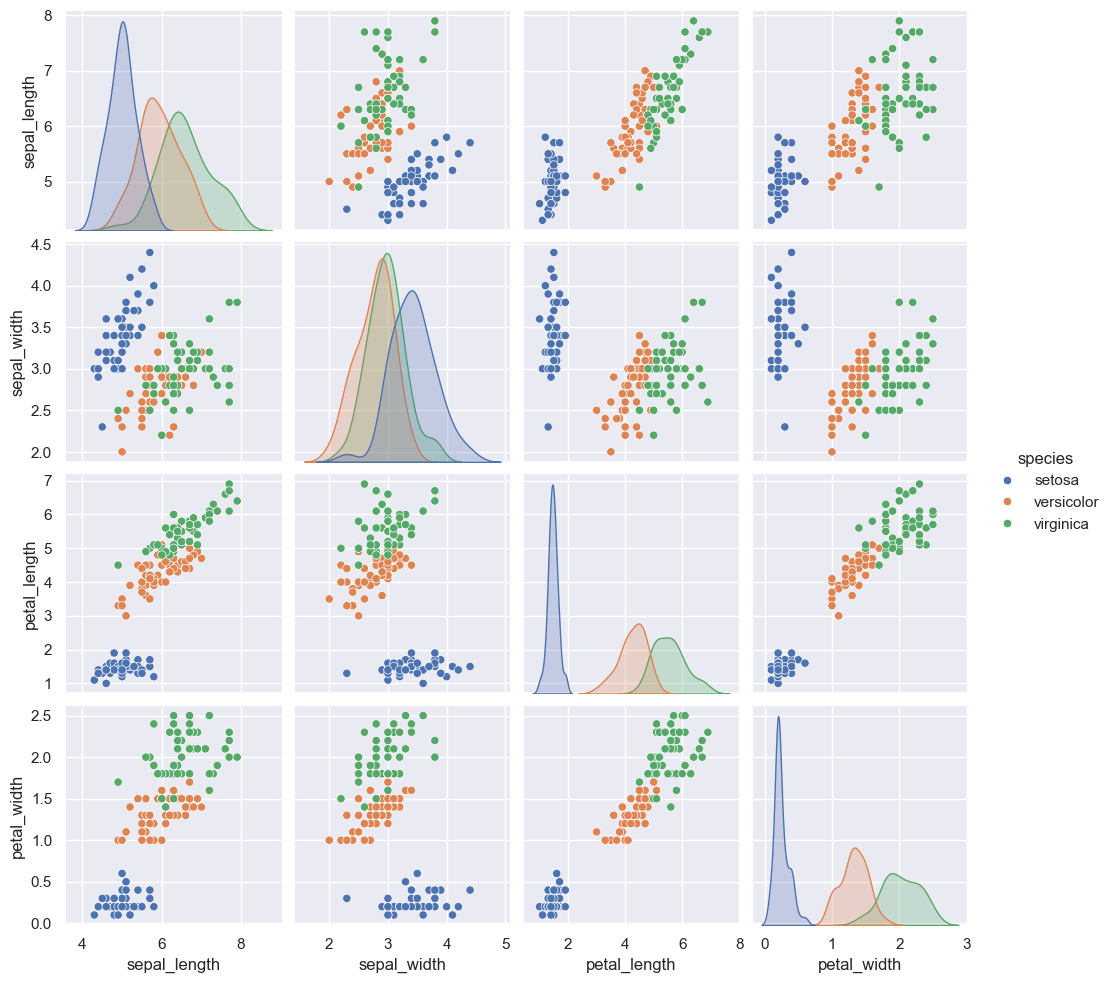

In [101]:
sns.pairplot(iris, hue="species")
plt.show()

As we also explored, we can create graphs of our own to analyze the relationship between variables.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


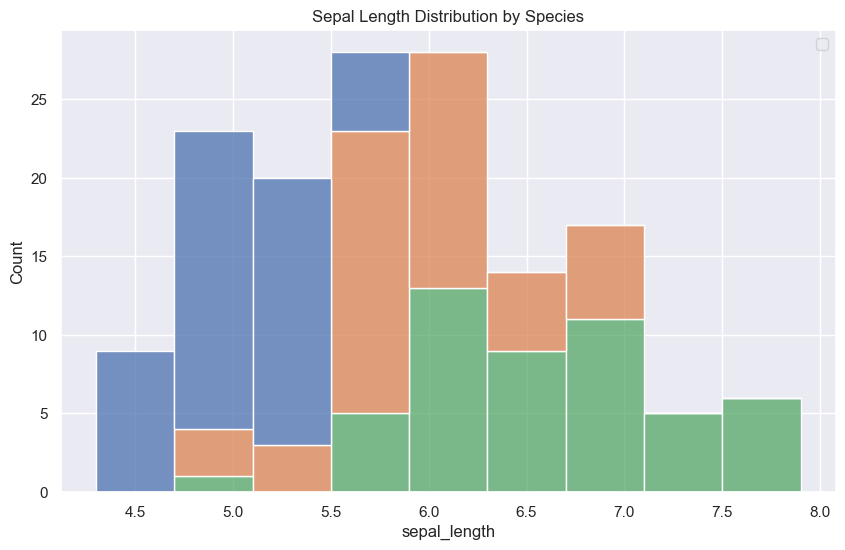

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(data=iris, x="sepal_length", hue="species", common_norm=False, multiple="stack", fill=True)
plt.title("Sepal Length Distribution by Species")
plt.legend()
plt.show()

We can also use feature engineering to create new columns that can be useful to us! As an example, we know the length and width of the sepal, we can make an assumption to calculate it's area by multiplying both values together.

In [103]:
iris["sepal_area"] = iris["sepal_length"] * iris["sepal_width"]
sepal_area_means = iris.groupby("species")["sepal_area"].mean()
print("\nSepal Area Means by Species:")
print(sepal_area_means)

iris["petal_area"] = iris["petal_length"] * iris["petal_width"]


Sepal Area Means by Species:
species
setosa        17.2578
versicolor    16.5262
virginica     19.6846
Name: sepal_area, dtype: float64


We can analyze correlations between variables, too! This is useful because it can help us in reducing the number of correlated features in our model, which in turn can improve model performance and reduce overfitting.

* When two or more independent variables are highly correlated, this can lead to problems when training a model because of **multicollienarity**. This can make our model unstable and more complex to understand, but we're getting ahead of ourselves.

In [104]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.10,11.96
146,6.3,2.5,5.0,1.9,virginica,15.75,9.50
147,6.5,3.0,5.2,2.0,virginica,19.50,10.40
148,6.2,3.4,5.4,2.3,virginica,21.08,12.42


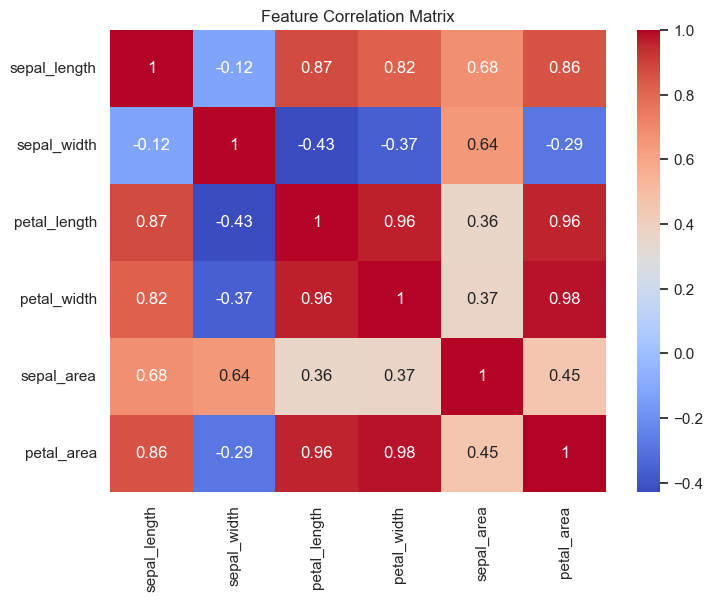

In [105]:
correlation_matrix = iris.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

And finally, after undergoing all of the preprocessing and performing exploratory data analysis, we can move on to training a computer to learn how to classify the plant type based on the data we provided! An example of the code can be seen below.

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = iris.drop("species", axis=1)
y = iris["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris["species"].unique())

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



However, we're getting way ahead of ourselves, and I don't want to overload you with a whole bunch of new information. If you've gotten this far in the notebook, thanks for sticking around! I'll integrate a lot of these learnings with Musicboard for our meeting on data analysis (will be recorded before evening of Saturday, 19 October; the original meeting date of 17 October has been postponed due to a midterm).